# **Task 1 - User Overview Analysis**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Read the clean data extracted using project_5_Data_wrangling_and_Data-Cleaning.ipynb**

In [ ]:
df1=pd.read_csv('/content/cleaned_telco_data.csv')

In [ ]:
df1.shape #to check the shape of data

(65397, 55)

In [ ]:
df1.head() #to check the first 5 rows of data

Bearer Id             Start  Start ms               End  End ms  \
0  1.311450e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
1  1.311450e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
2  1.311450e+19  09-04-2019 17:42       1.0  25-04-2019 11:58   652.0   
3  1.311450e+19  10-04-2019 00:31     486.0  25-04-2019 07:36   171.0   
4  1.311450e+19  12-04-2019 20:10     565.0  25-04-2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0        NaN  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15   
1        NaN  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2        NaN  2.082000e+14            NaN  3.528150e+13            D42335A   
3        NaN  2.082010e+14            NaN  3.535660e+13            T21824A   
4        NaN  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

In [ ]:
# check info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65397 entries, 0 to 65396
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 65397 non-null  float64
 1   Start                                     65397 non-null  object 
 2   Start ms                                  65397 non-null  float64
 3   End                                       65397 non-null  object 
 4   End ms                                    65397 non-null  float64
 5   Dur. (ms)                                 61855 non-null  float64
 6   IMSI                                      63950 non-null  float64
 7   MSISDN/Number                             54573 non-null  float64
 8   IMEI                                      65397 non-null  float64
 9   Last Location Name                        65396 non-null  object 
 10  Avg RTT DL (ms)                   

**Before performing operations like aggregations, merges, or machine learning, data types might need to be converted to match expected formats.**

In [ ]:
from unicodedata import category
import io

def convert_dtype(df1: pd.DataFrame, columns, dtype):
    for col in columns:
        df1[col] = df1[col].astype(dtype=dtype)
    return df1

In [ ]:
df1.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# **Task 1.0**

## **Top 10 handsets used by the customers**

In [ ]:
handset_count = df1['Handset Type'].value_counts()
print('Number of handset Users :',len(handset_count), "users")
print("Number of posts per user")
# Count the number of users for each handset type
handset_count = df1['Handset Type'].value_counts()

# Create a DataFrame with the top 10 handsets and their counts
top_10_handsets = handset_count.head(10).reset_index()
top_10_handsets.columns = ['Handset Type', 'Count']

# Print the DataFrame
top_10_handsets

Number of handset Users : 1037 users
Number of posts per user


Handset Type  Count
0              Huawei B528S-23A   9325
1       Apple iPhone 6S (A1688)   4031
2        Apple iPhone 6 (A1586)   4020
3                     undefined   3607
4        Apple iPhone 7 (A1778)   2913
5       Apple iPhone Se (A1723)   2214
6        Apple iPhone 8 (A1905)   2183
7       Apple iPhone Xr (A2105)   1899
8  Samsung Galaxy S8 (Sm-G950F)   1874
9        Apple iPhone X (A1901)   1597

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object', name='Handset Type')


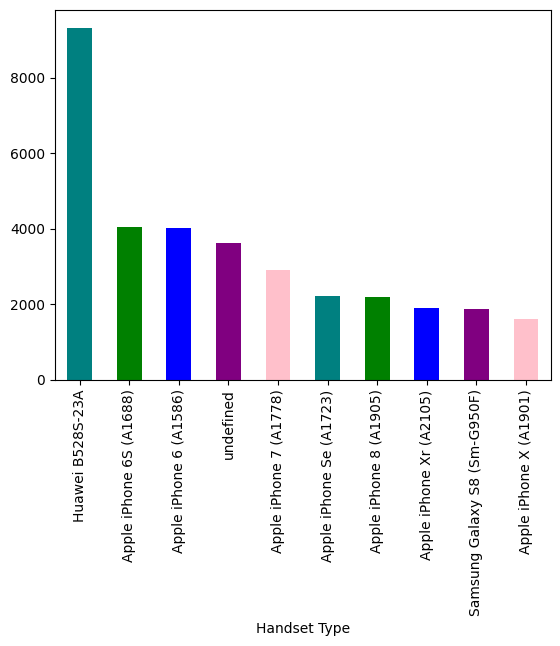

In [ ]:
handset_count[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])
print(handset_count[:10].keys())

- # **Interpretation:**
- **Most Popular Phones:**
- **Huawei B528S-23A** is the top handset with the most users.
- **Apple iPhones** are very popular, with models like the iPhone 6S, iPhone 6, and iPhone 7 being common.
- **Samsung Galaxy S8** is the only Samsung model in the top 10, showing it's also popular.
- **'Undefined' Issue:** A lot of devices are listed as 'undefined,' meaning their information isn't clear or missing.
# **Recommendation:**
- **Focus on Popular Models:**
- **Huawei B528S-23A:** Create special offers or support for this phone model.
- **Apple iPhones:** Develop products or services for these popular iPhone models.
- **Fix Data Problems**: Work on identifying and categorizing the 'undefined' devices to get better data.
- **Optimize for Samsung Galaxy S8:** Make sure your products or services work well with the Galaxy S8 and consider promoting it.

# **Top 3 handset manufacturers**

In [ ]:
# Count the number of users for each handset manufacturer
handset_manufacturer = df1['Handset Manufacturer'].value_counts()

# Create a DataFrame with the top 3 manufacturers and their counts
top_3_manufacturers = handset_manufacturer.head(3).reset_index()
top_3_manufacturers.columns = ['Handset Manufacturer', 'Count']

# Print the DataFrame
top_3_manufacturers

Handset Manufacturer  Count
0                Apple  26434
1              Samsung  16971
2               Huawei  15484

Number of handset users: 137 users
Number of posts per user


<Axes: xlabel='Handset Manufacturer'>

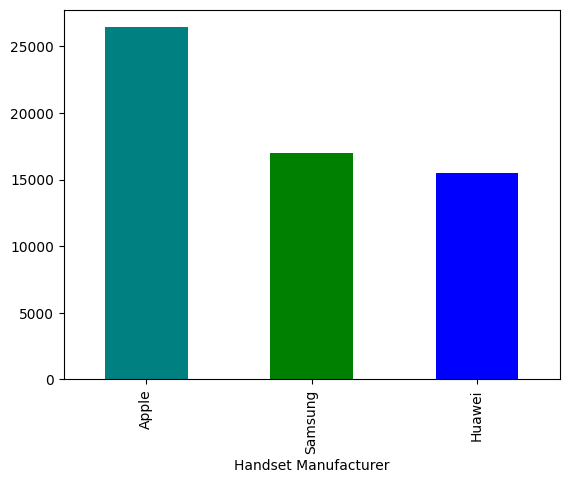

In [ ]:
handset_manufacturer = df1['Handset Manufacturer'].value_counts()
print('Number of handset users:',len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['teal', 'green', 'blue'])

- # **Interpretation:**
- **Top Manufacturers:**
- **Apple** leads with 27,529 users, indicating it's the most popular brand among the dataset.
- **Samsung** follows with 17,866 users, showing strong market presence but less than Apple.
- **Huawei** has 17,125 users, making it the third most popular manufacturer.
- **Market Dominance:**Apple dominates the market significantly compared to Samsung and Huawei, suggesting a stronger brand preference or market share.
- # **Recommendation:**
- **Focus on Apple:** Since Apple is the most popular, prioritize marketing efforts and product development for Apple users. Consider creating Apple-specific promotions or features.
- **Leverage Samsung and Huawei:** Develop targeted strategies for Samsung and Huawei users. Offer promotions or support tailored to their devices to attract and retain these users.
- **Monitor Market Trends:** Continuously track changes in manufacturer popularity to adapt strategies and stay competitive in the market.

# **Top 5 handsets per top 3 manufacturers**

In [ ]:
# Filter the DataFrame
handset_man = df1[df1['Handset Manufacturer'].isin(['Apple', 'Samsung', 'Huawei'])]

In [ ]:
# Group by 'Handset Manufacturer' and count 'Handset Type'
handset = handset_man.groupby(['Handset Manufacturer', 'Handset Type']).size()

In [ ]:
# Get the top 5 handset types for each manufacturer
top_handsets = pd.DataFrame()

for manufacturer in ['Apple', 'Samsung', 'Huawei']:
    manufacturer_data = handset[manufacturer].nlargest(5).reset_index()
    manufacturer_data['Handset Manufacturer'] = manufacturer
    top_handsets = pd.concat([top_handsets, manufacturer_data], ignore_index=True)

In [ ]:
# Rename columns to match the desired format
top_handsets.columns = ['Handset Type', 'Count', 'Handset Manufacturer']

top_handsets

Handset Type  Count Handset Manufacturer
0          Apple iPhone 6S (A1688)   4031                Apple
1           Apple iPhone 6 (A1586)   4020                Apple
2           Apple iPhone 7 (A1778)   2913                Apple
3          Apple iPhone Se (A1723)   2214                Apple
4           Apple iPhone 8 (A1905)   2183                Apple
5     Samsung Galaxy S8 (Sm-G950F)   1874              Samsung
6      Samsung Galaxy J3 (Sm-J330)   1481              Samsung
7       Samsung Galaxy A5 Sm-A520F   1474              Samsung
8      Samsung Galaxy J5 (Sm-J530)   1402              Samsung
9     Samsung Galaxy S7 (Sm-G930X)   1323              Samsung
10                Huawei B528S-23A   9038               Huawei
11                    Huawei E5180    984               Huawei
12  Huawei P20 Lite Huawei Nova 3E    857               Huawei
13                      Huawei P20    612               Huawei
14                  Huawei Y6 2018    414               Huawei

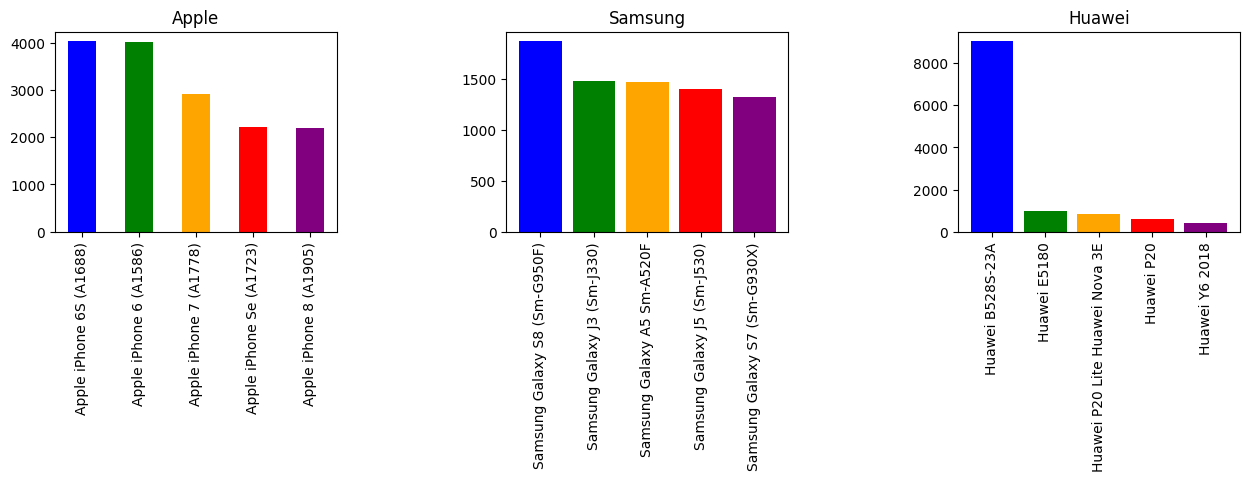

In [ ]:
# Filter data for each manufacturer
apple = top_handsets[top_handsets['Handset Manufacturer'] == 'Apple']
samsung = top_handsets[top_handsets['Handset Manufacturer'] == 'Samsung']
huawei = top_handsets[top_handsets['Handset Manufacturer'] == 'Huawei']

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot Apple handsets
ax[0].bar(apple['Handset Type'], apple['Count'], tick_label=apple['Handset Type'],
          width=0.5, color=['blue', 'green', 'orange', 'red', 'purple'])
ax[0].set_title('Apple')
ax[0].tick_params(axis='x', labelrotation=90)

# Plot Samsung handsets
ax[1].bar(samsung['Handset Type'], samsung['Count'], tick_label=samsung['Handset Type'],
          width=0.8, color=['blue', 'green', 'orange', 'red', 'purple'])
ax[1].set_title('Samsung')
ax[1].tick_params(axis='x', labelrotation=90)

# Plot Huawei handsets
ax[2].bar(huawei['Handset Type'], huawei['Count'], tick_label=huawei['Handset Type'],
          width=0.8, color=['blue', 'green', 'orange', 'red', 'purple'])
ax[2].set_title('Huawei')
ax[2].tick_params(axis='x', labelrotation=90)

# Adjust layout
plt.subplots_adjust(left=0.2, right=0.99, bottom=0.2, top=0.6, wspace=0.6, hspace=0.4)

# Show plot
plt.show()

- # **Analysis:**
- **Apple:** The top 5 handsets are all iPhones, with the iPhone 6S, iPhone 6, and iPhone 7 being the most popular. This suggests a strong preference for Apple’s older models.
- **Samsung:** The top 5 handsets include various Galaxy models, with the Galaxy S8 being the most popular. Samsung users favor a mix of models, but Galaxy S8 leads.
- **Huawei**: The top 5 handsets are dominated by the B528S-23A model, with other models like the E5180 and P20 Lite also popular. Huawei’s market is led by a few key models.
- # **Interpretation:**
- **Apple** has a high preference for its older iPhone models.
- **Samsung** users have a diverse preference but favor the Galaxy S8.
- **Huawei** users predominantly choose the B528S-23A, with a few other models also popular.
- # **Recommendation:**
- **Apple:** Focus on accessories and services for older iPhone models.
- **Samsung:** Tailor marketing strategies for the Galaxy S8 while offering support for other popular models.
- **Huawei:** Prioritize products and services for the B528S-23A, and consider promoting other popular Huawei models.

# **Top 10 location**

In [ ]:
#Count the number of occurrences for each unique value in 'Last Location Name'
handset_manufacturer = df1['Last Location Name'].value_counts()

# Print the total number of users
print(len(handset_manufacturer), "users")

# Print the top 10 locations
handset_manufacturer[:10]

29020 users


Last Location Name
9.16457E+15    1428
8.12222E+16      94
D73604C          40
T12312C          33
T42204B          32
D41377B          32
D92928A          31
D11119B          30
D92937A          30
1.5328E+17       30
Name: count, dtype: int64

In [ ]:
# Count the number of occurrences for each unique value in 'Last Location Name'
location_counts = df1['Last Location Name'].value_counts()

# Print the total number of unique locations
print(len(location_counts), "unique locations")

# Get the top 10 locations
top_10_locations = location_counts.head(10)

29020 unique locations


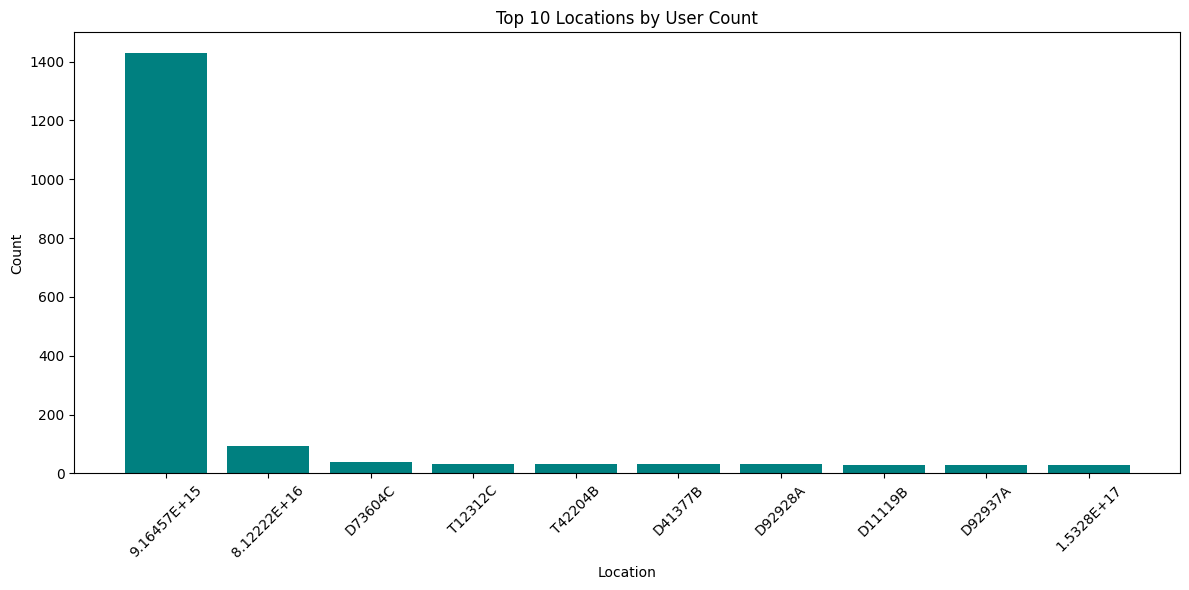

In [ ]:
# Plot a bar chart of the top 10 locations
plt.figure(figsize=(12, 6))
plt.bar(top_10_locations.index, top_10_locations.values, color='teal')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations by User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- # **Analysis**
- **Data Summary:** The bar chart shows the top 10 most frequently reported locations from the 'Last Location Name' column. Each bar represents the number of times users were recorded in that location.
Interpretation
- **Popular Locations:** Locations with higher bars are more commonly reported, indicating they are popular or significant places for users.
- # **Recommendation**
- **Target Marketing:** Focus efforts on the top locations for marketing or service improvements.
- **Data Accuracy:** Ensure location data is accurately recorded for better insights.

**The data reveals that the most frequently reported location is 9.16457E+15 with 307 entries, highlighting a significant user presence in that area. Other locations have notably fewer entries, indicating a concentration of activity in specific regions.**

# **Analysis of Handset Manufacturer Popularity Across the Top 10 Locations**

In [ ]:
# Count occurrences of each location
location_counts = df1['Last Location Name'].value_counts()

# Get the top 10 locations
top_10_locations = location_counts.head(10).index

# Filter the data to include only top 10 locations
filtered_df = df1[df1['Last Location Name'].isin(top_10_locations)]

# Group by 'Handset Manufacturer' and 'Last Location Name' and count occurrences
location_handset_counts = filtered_df.groupby(['Handset Manufacturer', 'Last Location Name']).size().unstack(fill_value=0)

# Reset index to create a DataFrame suitable for analysis
location_handset_counts.reset_index(inplace=True)

# Display the DataFrame
location_handset_counts


Last Location Name                    Handset Manufacturer  1.5328E+17  \
0                                                  ASUSTeK           0   
1                                                     Acer           0   
2                                                    Apple          10   
3                                                Archos Sa           0   
4                                                  Asustek           0   
5                                                Crosscall           0   
6                                               Google Inc           0   
7                                            Hmd Global Oy           0   
8                                                      Htc           0   
9                                                   Huawei           1   
10                                  Kiwip Technologies Sas           1   
11                                                      LG           0   
12                                                  Lenovo           1   
13                                                      Lg           1   
14                                              Logicom Sa           0   
15                                     Microsoft Mobile Oy           0   
16                                                   Nokia           0   
17                    Oneplus Technology (Shenzhen) Co Ltd           0   
18                                                    Oppo           0   
19                                                     Rim           0   
20                                                 Samsung           6   
21                       Shenzhen Diadem Technology Co Ltd           0   
22                  Shenzhen Fortuneship Technology Co Ltd           0   
23                        Simcom Wireless Solutions Co Ltd           1   
24                                           Sony Ericsson           1   
25                           Sony Mobile Communications AB           0   
26                           Sony Mobile Communications Ab           3   
27                                  Spa Condor Electronics           0   
28                             TP-Link Technologies Co Ltd           0   
29                                   Tcl Communication Ltd           0   
30                             Tp-Link Technologies Co Ltd           0   
31                                        Wiko Global Sasu           4   
32                            Xiaomi Communications Co Ltd           0   
33                                                     Zte           0   
34                                               undefined           1   

Last Location Name  8.12222E+16  9.16457E+15  D11119B  D41377B  D73604C  \
0                             0            2        0        0        0   
1                             2            0        0        0        0   
2                            36          719       13       12       27   
3                             1            0        0        0        0   
4                             0           11        0        0        0   
5                             0            3        0        0        0   
6                             0            2        0        0        0   
7                             1            2        0        0        0   
8                             0            4        0        1        0   
9                             8          177        2        2        5   
10                            0            0        0        0        0   
11                            0            2        0        0        0   
12                            0           13        0        0        0   
13                            0            2        0        0        0   
14                            1            0        0        0        0   
15                            1            0        0        0        0   
16                            1            1        0       

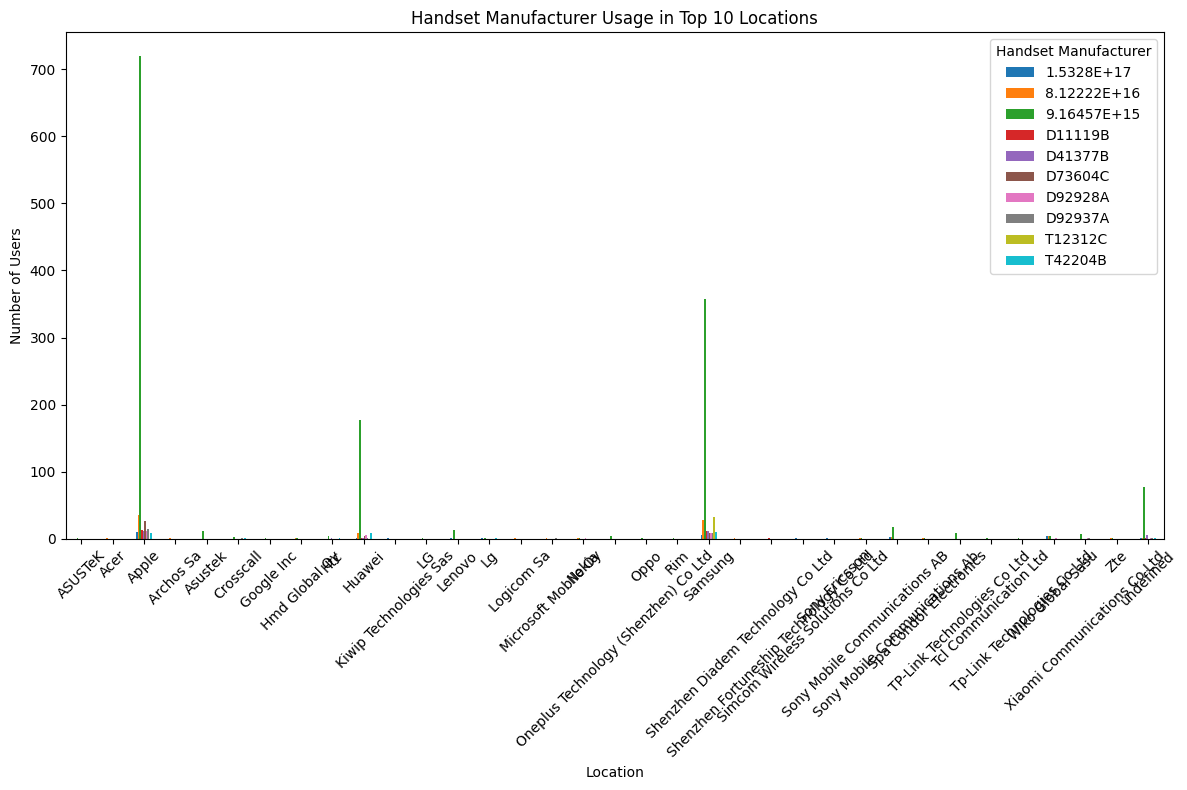

In [ ]:
# Count occurrences of each location
location_counts = df1['Last Location Name'].value_counts()

# Get the top 10 locations
top_10_locations = location_counts.head(10).index

# Filter the data to include only top 10 locations
filtered_df = df1[df1['Last Location Name'].isin(top_10_locations)]

# Group by 'Handset Manufacturer' and 'Last Location Name' and count occurrences
location_handset_counts = filtered_df.groupby(['Handset Manufacturer', 'Last Location Name']).size().unstack(fill_value=0)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each location
location_handset_counts.plot(kind='bar', ax=ax, colormap='tab10')

ax.set_xlabel('Location')
ax.set_ylabel('Number of Users')
ax.set_title('Handset Manufacturer Usage in Top 10 Locations')
ax.legend(title='Handset Manufacturer')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Analysis**
- **Manufacturer Popularity:**

- **Apple** stands out with high counts for multiple models, indicating a strong presence in the dataset.
- **Samsung** also shows significant counts, especially for models like 368 and 368.
- **Handset Popularity:**
Model 9.16457E+15 appears frequently across multiple manufacturers, suggesting it's a commonly referenced model.
Model D92937A also appears multiple times but less frequently than 9.16457E+15.
- **Sparse Data:**
Many manufacturers have 0 counts for most handset models, which could indicate less variety or fewer observations.
- **Unusual Entries:** Row 34 (undefined) shows high counts for model 9.16457E+15, which might indicate missing or unclassified data.

## **Task 1.1**

 -  Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


In [ ]:
# Group by 'IMEI' and count the number of 'Bearer Id'
session_count = df1.groupby('IMEI').agg(
    session_count=('Bearer Id', 'count')
).reset_index()

# Filter to get IMEI with more than 10 sessions
session_count_filtered = session_count[session_count['session_count'] > 10]

In [ ]:
session_count_filtered

IMEI  session_count
177   3.515540e+13            191
178   3.515550e+13            162
179   3.515580e+13            147
185   3.515800e+13             32
188   3.515970e+13             26
...            ...            ...
3057  8.698280e+13             63
3063  8.699070e+13             77
3065  8.699580e+13             28
3069  9.900030e+13             11
3073  9.900120e+13             15

[1019 rows x 2 columns]

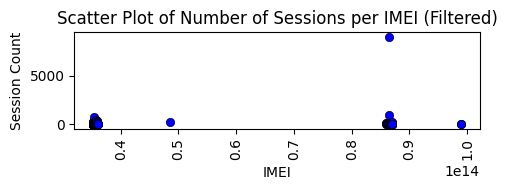

In [ ]:
# Plotting
plt.figure(figsize=(5, 2))
sns.scatterplot(x='IMEI', y='session_count', data=session_count_filtered, color='blue', edgecolor='k')
plt.xlabel('IMEI')
plt.ylabel('Session Count')
plt.title('Scatter Plot of Number of Sessions per IMEI (Filtered)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **Interpretation**
**IMEI:** The values in this column are unique to each device, so each IMEI corresponds to a distinct mobile phone.

**session_count:** This column shows how frequently each device has been used. For instance:

An IMEI with a session count of 204 has been used 204 times.
An IMEI with a session count of 11 has been used only 11 times.



In [ ]:
df1.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [ ]:
df1['MSISDN/Number'].value_counts().head()

MSISDN/Number
3.361489e+10    17
3.362632e+10    16
3.362708e+10    12
3.369879e+10    11
3.366159e+10    10
Name: count, dtype: int64

In [ ]:
df1['Dur. (ms)'].value_counts().head()

Dur. (ms)
86399.0    8654
86400.0    2699
86398.0      67
85499.0      59
86397.0      53
Name: count, dtype: int64

In [ ]:
# Group by 'MSISDN/Number' and sum the session durations
session_duration = df1.groupby('MSISDN/Number').agg(
    {'Dur. (ms)': ['sum']}).reset_index()

# Filter to get MSISDN/Number with total duration greater than 1,000,00 ms
session_duration[session_duration['Dur. (ms)']['sum'] > 100000]


MSISDN/Number Dur. (ms)
                          sum
0      3.360171e+10  120298.0
1      3.360172e+10  127918.0
2      3.360172e+10  293781.0
9      3.360176e+10  187066.0
13     3.360178e+10  140072.0
...             ...       ...
44366  3.369999e+10  131254.0
44374  3.369999e+10  273548.0
44376  3.369999e+10  176599.0
44378  3.370000e+10  215607.0
44381  3.370000e+10  124445.0

[18174 rows x 2 columns]

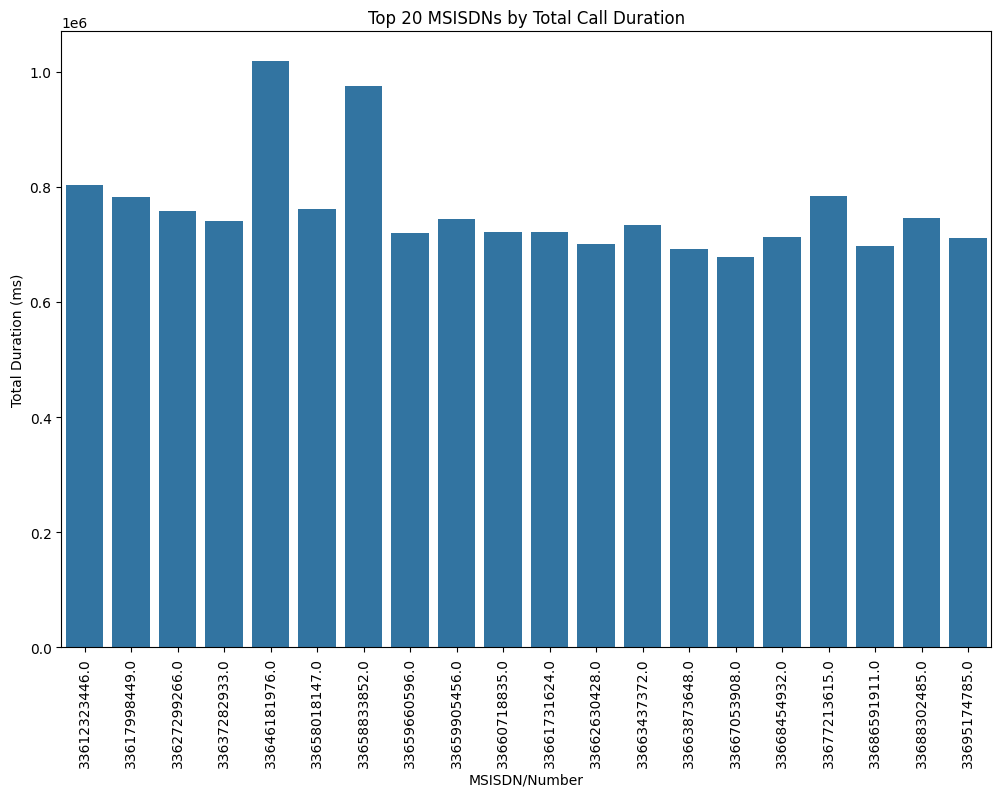

In [ ]:

session_duration = df1.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration.columns = ['MSISDN/Number', 'Total_Duration(ms)']
# Sort values by total duration
session_duration = session_duration.sort_values(by='Total_Duration(ms)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='MSISDN/Number', y='Total_Duration(ms)', data=session_duration.head(20))  # Show top 20
plt.title('Top 20 MSISDNs by Total Call Duration')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Duration (ms)')
plt.xticks(rotation=90)
plt.show()

# - **Interpretation**
- **1. Top Users by Session Duration**
- **High Activity Users**: MSISDNs with larger values in the Dur. (ms) column are associated with users who have spent more time in sessions. For instance, the user associated with MSISDN 3.360172e+10 with a total duration of 293,781 ms is among the most active.
- **Diversity of Usage:** With 19,051 rows, the dataset suggests a large user base, each with varying levels of activity.
- **2. Spread of Session Durations**
- **Distribution:** The data likely includes a wide range of session durations, from relatively low (e.g., 120,298 ms) to significantly higher values (e.g., 293,781 ms). This variation indicates diverse usage patterns among the users.
- # **Recommendations**
- **1. Target High-Value Users**
- **Engage Top Users:** Users with high session durations could be considered high-value customers. Engage them with personalized offers, rewards, or premium services to enhance loyalty and satisfaction.

In [ ]:
# Group by 'MSISDN/Number' and sum the total download and upload data
total_download_upload = df1.groupby('MSISDN/Number').agg(
    {'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'})#.sum(axis=1)

total_download_upload

Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                    
3.360171e+10       1.498037e+09        89299844.0
3.360172e+10       3.060978e+08        28593661.0
3.360172e+10       7.959698e+08        95873013.0
3.360172e+10       2.820175e+08        64300458.0
3.360173e+10       7.311458e+08        39400081.0
...                         ...               ...
3.370000e+10       8.232038e+08        47333803.0
3.370000e+10       6.504633e+08        29957046.0
3.370000e+10       6.992026e+08        12057314.0
3.370000e+10       7.839767e+08        42725269.0
3.370000e+10       5.465595e+08        37841418.0

[44383 rows x 2 columns]

- # **Interpretation**
Some users download a lot of data, while others download less.
The same goes for uploads—some users upload a lot, and others much less.
- # **Recommendations**
-**High Data Users:**Offer special plans or rewards to users who use a lot of data.
- **Low Data Users:** Find out why some users aren’t using much data and help them get more engaged.
- **Network Planning:** Make sure your network can handle the high data users without slowing down.
- **Encourage Uploads**: Promote services that involve sharing or uploading data, like cloud storage.

In [ ]:
total_youtube_data = df1.groupby('MSISDN/Number').agg(
    {'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum'}).reset_index()
total_youtube_data

MSISDN/Number  Youtube DL (Bytes)  Youtube UL (Bytes)
0       3.360171e+10          36782012.0          30590504.0
1       3.360172e+10           7393957.0           2857409.0
2       3.360172e+10          21481587.0          21389716.0
3       3.360172e+10           1747621.0          16447885.0
4       3.360173e+10           4870286.0          11615235.0
...              ...                 ...                 ...
44378   3.370000e+10           9222456.0           9018028.0
44379   3.370000e+10          13342221.0            397854.0
44380   3.370000e+10          11262728.0           4029541.0
44381   3.370000e+10          15428461.0          17073801.0
44382   3.370000e+10          15244247.0          15731977.0

[44383 rows x 3 columns]

# **Interpretation**
- The data shows how much each user (identified by MSISDN/Number) is downloading and uploading on YouTube.
- Some users are heavily using YouTube, with high download and upload volumes, while others are using it less.
# **Recommendations**
- **Offer YouTube Data Plans**: Create special data plans for users who watch or upload a lot on YouTube.
- **Encourage Content Creation:** Promote features or plans that support users who frequently upload videos, as they might benefit from faster upload speeds or more data.
- **Targeted Marketing:** Offer personalized promotions or rewards to users who are frequent YouTube users to enhance their experience and loyalty.

In [ ]:
# Group by 'MSISDN/Number' and sum the total download and upload data for Social Media
total_socialmedia_data = df1.groupby('MSISDN/Number').agg(
    social_media_dl_bytes=('Social Media DL (Bytes)', 'sum'),
    social_media_ul_bytes=('Social Media UL (Bytes)', 'sum')
).reset_index()

total_socialmedia_data

MSISDN/Number  social_media_dl_bytes  social_media_ul_bytes
0       3.360171e+10              4084552.0               123850.0
1       3.360172e+10                82350.0                24714.0
2       3.360172e+10              4259268.0               105376.0
3       3.360172e+10               162173.0                36881.0
4       3.360173e+10              2534186.0                48643.0
...              ...                    ...                    ...
44378   3.370000e+10              3435171.0                 5642.0
44379   3.370000e+10              1411056.0                61577.0
44380   3.370000e+10              1461004.0                  467.0
44381   3.370000e+10              1532483.0                 1606.0
44382   3.370000e+10               767899.0                19718.0

[44383 rows x 3 columns]

- # **Interpretation**
- The data shows the amount of data each user is downloading and uploading on social media.
- Some users are downloading and uploading a lot of social media content, while others are using much less data.
- # **Recommendations**
- **Social Media Plans:** Offer specialized data plans for users who are active on social media, focusing on download-heavy or upload-heavy users.
- **Promote Sharing Features:** Encourage users who download a lot to also share and upload content, perhaps by offering bonuses or faster upload speeds.
- **Targeted Ads:** Use this data to send personalized promotions or ads for social media-related services, targeting users based on their usage patterns.

In [ ]:
# Group by 'MSISDN/Number' and sum the total download and upload data for Netflix
total_netflix_data = df1.groupby('MSISDN/Number').agg(
    netflix_dl_bytes=('Netflix DL (Bytes)', 'sum'),
    netflix_ul_bytes=('Netflix UL (Bytes)', 'sum')
).reset_index()

total_netflix_data

MSISDN/Number  netflix_dl_bytes  netflix_ul_bytes
0       3.360171e+10        30393172.0        29368206.0
1       3.360172e+10         5911032.0        17327493.0
2       3.360172e+10        24985529.0        25633852.0
3       3.360172e+10         8954329.0        21767265.0
4       3.360173e+10        14704799.0        20247125.0
...              ...               ...               ...
44378   3.370000e+10        13077779.0        11096364.0
44379   3.370000e+10         6090685.0         5098738.0
44380   3.370000e+10         6233259.0         4103812.0
44381   3.370000e+10        14760964.0          427041.0
44382   3.370000e+10        14313462.0         7022955.0

[44383 rows x 3 columns]

- # **Interpretation**
- The data shows the amount of data each user is downloading and uploading on Netflix.
- Many users have significant Netflix data usage, indicating they are streaming or downloading content heavily, with some also uploading a substantial amount.
- # **Recommendations**
- **Netflix-Focused Data Plans:** Offer data packages tailored for Netflix users, possibly including higher download limits or bundled streaming services.
- **- Enhance Upload Speeds:** Users with high upload activity might benefit from plans with faster upload speeds, which could be promoted to them.
- **Engagement Offers:** Encourage frequent Netflix users to explore other content or services by offering them special promotions or discounts on related entertainment services.

In [ ]:
total_google_data = df1.groupby('MSISDN/Number').agg(
    {'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum'})
total_google_data

Google DL (Bytes)  Google UL (Bytes)
MSISDN/Number                                      
3.360171e+10          13528299.0          7623716.0
3.360172e+10           4740760.0          3984160.0
3.360172e+10           8183663.0          3680185.0
3.360172e+10           6718912.0          1351618.0
3.360173e+10           4815936.0          2037024.0
...                          ...                ...
3.370000e+10           9333212.0          3790123.0
3.370000e+10           6617674.0          2923830.0
3.370000e+10           4056274.0           247898.0
3.370000e+10           9637156.0          1550555.0
3.370000e+10           9337468.0          2020816.0

[44383 rows x 2 columns]

- # **Interpretation**
- The data shows the amount of data each user is downloading and uploading on Google services.
- Users have varying levels of usage, with some downloading and uploading substantial amounts of data on Google platforms.
# - **Recommendations**
- **Google Services Data Plans:** Create data plans specifically for users with high Google service usage, such as extra data for Google Drive or cloud services.
- **Optimize Upload Speeds:** Users who frequently upload data might benefit from faster upload speeds, so consider offering premium upload options.
- **Promote Google Services:** Offer promotions or incentives to users based on their Google service usage, like discounts on Google Workspace or additional cloud storage.

In [ ]:
total_email_data = df1.groupby('MSISDN/Number').agg(
    {'Email DL (Bytes)': 'sum', 'Email UL (Bytes)':'sum'}).reset_index()
total_email_data

MSISDN/Number  Email DL (Bytes)  Email UL (Bytes)
0       3.360171e+10         2355825.0          929341.0
1       3.360172e+10         1052531.0          819995.0
2       3.360172e+10         3191391.0         1559239.0
3       3.360172e+10         1600814.0          198210.0
4       3.360173e+10          576042.0          431897.0
...              ...               ...               ...
44378   3.370000e+10          266337.0          362564.0
44379   3.370000e+10         2074255.0          690866.0
44380   3.370000e+10          255240.0          315420.0
44381   3.370000e+10          399928.0          589194.0
44382   3.370000e+10          818958.0          213219.0

[44383 rows x 3 columns]

- # **Interpretation**
- The data shows how much data each user is downloading and uploading through email.
- Most users have relatively lower data usage for email compared to other services like streaming or social media.
- # **Recommendations**
- **Email Data Plans:** Consider adding or modifying plans to include more data specifically for email usage, especially if email usage grows.
- **Optimize Email Services:** For users with high email data usage, offer options to increase efficiency, such as improved email attachments or storage solutions.
- **Promotions for Business Users:** Target business users who rely heavily on email with special offers or enhancements for their email services.

In [ ]:
total_gaming_data =df1.groupby('MSISDN/Number').agg(
    {'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)':'sum'}).reset_index()
total_gaming_data

MSISDN/Number  Gaming DL (Bytes)  Gaming UL (Bytes)
0       3.360171e+10       1.410893e+09         12505682.0
1       3.360172e+10       2.869172e+08          2079344.0
2       3.360172e+10       7.338684e+08         24409262.0
3       3.360172e+10       2.628336e+08          9283682.0
4       3.360173e+10       7.036445e+08          1309012.0
...              ...                ...                ...
44378   3.370000e+10       7.878688e+08         11413338.0
44379   3.370000e+10       6.209274e+08         14743093.0
44380   3.370000e+10       6.759341e+08          2686192.0
44381   3.370000e+10       7.422177e+08          7979424.0
44382   3.370000e+10       5.060775e+08          3784662.0

[44383 rows x 3 columns]

- # **Interpretation**
- The data shows how much each user is downloading and uploading related to gaming.
- Many users are downloading large amounts of data for gaming, with varying upload volumes.
- # **Recommendations**
- **Gaming Data Plans**: Develop data plans specifically for gamers, offering higher download and upload limits to cater to their needs.
- **Optimize Gaming Experience:** Improve network performance for users with high gaming data usage to reduce latency and enhance their gaming experience.
- **Promote Gaming Services:** Offer promotions or discounts on gaming-related services, such as in-game purchases or gaming subscriptions, to users with high gaming data usage

In [ ]:
total_other_data = df1.groupby('MSISDN/Number').agg(
    {'Other DL (Bytes)': 'sum','Other UL (Bytes)':'sum'}).reset_index()
total_other_data

MSISDN/Number  Other DL (Bytes)  Other UL (Bytes)
0       3.360171e+10      1.318230e+09         8158545.0
1       3.360172e+10      3.306671e+08         1500546.0
2       3.360172e+10      1.268687e+09        19095383.0
3       3.360172e+10      6.541862e+08        15214917.0
4       3.360173e+10      1.537985e+08         3711145.0
...              ...               ...               ...
44378   3.370000e+10      2.350793e+08        11647744.0
44379   3.370000e+10      5.409470e+08         6041088.0
44380   3.370000e+10      7.473662e+08          673984.0
44381   3.370000e+10      1.104631e+08        15103648.0
44382   3.370000e+10      4.223723e+08         9048071.0

[44383 rows x 3 columns]

- # **Interpretation**
- The data reflects other types of downloads and uploads not covered by the previous categories (e.g., miscellaneous apps, web browsing).
- There is significant variation in both download and upload volumes, indicating diverse usage patterns.
- # **Recommendations**
- **Custom Plans for Miscellaneous Data:** Consider offering data plans that cover miscellaneous or unspecified data usage for users with substantial "Other" data needs.
- **Monitor Trends:** Keep an eye on trends in this category to understand emerging data usage patterns and adjust plans or services accordingly.
- **Promote Data Management Tools:** Provide tools or tips for users to better manage their overall data consumption, especially for varied usage patterns.

# **Task 1.2**

## **Mean, Median, Mode**

In [ ]:
# convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to str

to_string = ['IMEI', 'IMSI', 'MSISDN/Number']

for col in to_string:
   df1[col] = df1[col].astype('category')

In [ ]:
# Compute central tendency measures for numeric columns
central_tendency_measure = pd.DataFrame(
    {
     'mean': df1.mean(numeric_only=True),
     'median': df1.median(numeric_only=True),
     'mode': df1.mode(numeric_only=True).iloc[0],  # Take the first mode
     'min': df1.min(numeric_only=True),
     'max': df1.max(numeric_only=True)
    }
)

# Transpose to match the desired format
central_tendency_measure = central_tendency_measure

In [ ]:
central_tendency_measure

mean        median  \
Bearer Id                                 1.019507e+19  1.013887e+19   
Start ms                                  5.005242e+02  5.010000e+02   
End ms                                    4.992457e+02  5.010000e+02   
Dur. (ms)                                 8.667886e+04  8.639900e+04   
Avg RTT DL (ms)                           6.456684e+01  5.100000e+01   
Avg RTT UL (ms)                           1.033397e+01  6.000000e+00   
Avg Bearer TP DL (kbps)                   7.597589e+03  6.200000e+01   
Avg Bearer TP UL (kbps)                   3.792005e+02  5.500000e+01   
TCP DL Retrans. Vol (Bytes)               1.358105e+07  2.080991e+07   
TCP UL Retrans. Vol (Bytes)               5.178920e+05  7.596587e+05   
DL TP < 50 Kbps (%)                       9.686351e+01  1.000000e+02   
50 Kbps < DL TP < 250 Kbps (%)            1.405070e+00  0.000000e+00   
250 Kbps < DL TP < 1 Mbps (%)             1.978765e-01  0.000000e+00   
DL TP > 1 Mbps (%)                        1.720415e-01  0.000000e+00   
UL TP < 10 Kbps (%)                       9.960047e+01  1.000000e+02   
10 Kbps < UL TP < 50 Kbps (%)             0.000000e+00  0.000000e+00   
50 Kbps < UL TP < 300 Kbps (%)            0.000000e+00  0.000000e+00   
UL TP > 300 Kbps (%)                      0.000000e+00  0.000000e+00   
HTTP DL (Bytes)                           7.225912e+07  1.144710e+08   
HTTP UL (Bytes)                           2.167429e+06  3.242301e+06   
Activity Duration DL (ms)                 1.678236e+05  3.068900e+04   
Activity Duration UL (ms)                 1.603945e+05  3.857900e+04   
Dur. (ms).1                               8.667941e+07  8.639994e+07   
Nb of sec with 125000B < Vol DL           7.469756e+02  9.897000e+02   
Nb of sec with 1250B < Vol UL < 6250B     2.510403e+02  3.404344e+02   
Nb of sec with 31250B < Vol DL < 125000B  6.136760e+02  8.108374e+02   
Nb of sec with 37500B < Vol UL            1.492571e+02  1.492571e+02   
Nb of sec with 6250B < Vol DL < 31250B    7.280222e+02  9.654648e+02   
Nb of sec with 6250B < Vol UL < 37500B    1.413048e+02  1.413048e+02   
Nb of sec with Vol DL < 6250B             7.911678e+02  1.640000e+02   
Nb of sec with Vol UL < 1250B             7.498632e+02  1.820000e+02   
Social Media DL (Bytes)                   1.794917e+06  1.792247e+06   
Social Media UL (Bytes)                   3.291052e+04  3.286100e+04   
Google DL (Bytes)                         5.768920e+06  5.800350e+06   
Google UL (Bytes)                         2.054472e+06  2.054733e+06   
Email DL (Bytes)                          1.789640e+06  1.789296e+06   
Email UL (Bytes)                          4.667491e+05  4.642505e+05   
Youtube DL (Bytes)                        1.160698e+07  1.158912e+07   
Youtube UL (Bytes)                        1.098768e+07  1.098133e+07   
Netflix DL (Bytes)                        1.162738e+07  1.166908e+07   
Netflix UL (Bytes)                        1.098811e+07  1.096731e+07   
Gaming DL (Bytes)                         4.218075e+08  4.223351e+08   
Gaming UL (Bytes)                         8.275028e+06  8.274077e+06   
Other DL (Bytes)                          4.197163e+08  4.213430e+08   
Other UL (Bytes)                          8.255716e+06  8.246510e+06   
Total UL (Bytes)                          4.105718e+07  4.107186e+07   
Total DL (Bytes)                          4.543954e+08  4.548613e+08   

                                                  mode           min  \
Bearer Id                                 1.304240e+19  6.917540e+18   
Start ms                                  8.060000e+02  0.000000e+00   
End ms                                    2.480000e+02  0.000000e+00   
Dur. (ms)                                 8.639900e+04  7.142000e+03   
Avg RTT DL (ms)                           1.097957e+02  0.000000e+00   
Avg RTT UL (ms)                           1.766288e+01  0.000000e+00   
Avg Bearer TP DL (kbps)                   2.300000e+01  0.000000e+00   
Avg Bearer TP UL 

- # **Interpretation**
- **Average Values:** The average session has a duration of about 86,788 ms (or roughly 87 seconds) with average download and upload speeds of 7.63 kbps and 0.38 kbps, respectively. Average round-trip times (RTT) for download and upload are 64.75 ms and 10.47 ms.
- **Median Values**: The median values are close to the average but slightly lower, suggesting that while many sessions are similar to the average, there are a few sessions that significantly deviate.
- **Mode Values:** The most common session length is 86,399 ms, with typical download and upload speeds being 23 kbps and 40 kbps. The mode RTT values are higher than the average, indicating a common experience of higher latency.
- **Range:** Sessions range widely from very short (0 ms) to long (244,832 ms), and speeds and RTTs vary significantly.

In [ ]:
df1.describe(exclude=[object])

Bearer Id      Start ms        End ms      Dur. (ms)          IMSI  \
count   6.539700e+04  65397.000000  65397.000000   61855.000000  6.395000e+04   
unique           NaN           NaN           NaN            NaN  4.000000e+00   
top              NaN           NaN           NaN            NaN  2.082020e+14   
freq             NaN           NaN           NaN            NaN  3.669400e+04   
mean    1.019507e+19    500.524214    499.245669   86678.857182           NaN   
std     2.881255e+18    288.863897    287.801919   54363.299265           NaN   
min     6.917540e+18      0.000000      0.000000    7142.000000           NaN   
25%     7.349880e+18    251.000000    253.000000   33573.000000           NaN   
50%     1.013887e+19    501.000000    501.000000   86399.000000           NaN   
75%     1.304240e+19    751.000000    751.000000  118090.000000           NaN   
max     1.318650e+19    999.000000    999.000000  244832.000000           NaN   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count    5.457300e+04  6.539700e+04     61592.000000     61274.000000   
unique   4.438300e+04  3.074000e+03              NaN              NaN   
top      3.361489e+10  8.637690e+13              NaN              NaN   
freq     1.700000e+01  9.038000e+03              NaN              NaN   
mean              NaN           NaN        64.566838        10.333969   
std               NaN           NaN        38.687466         8.972896   
min               NaN           NaN         0.000000         0.000000   
25%               NaN           NaN        34.000000         3.000000   
50%               NaN           NaN        51.000000         6.000000   
75%               NaN           NaN       107.000000        17.662883   
max               NaN           NaN       221.000000        39.000000   

        Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count              59737.000000  ...        6.539600e+04        6.539600e+04   
unique                      NaN  ...                 NaN                 NaN   
top                         NaN  ...                 NaN                 NaN   
freq                        NaN  ...                 NaN                 NaN   
mean                7597.588831  ...        1.160698e+07        1.098768e+07   
std                13052.833918  ...        6.713435e+06        6.337964e+06   
min                    0.000000  ...        5.800000e+01        1.050000e+02   
25%                   43.000000  ...        5.784538e+06        5.505642e+06   
50%                   62.000000  ...        1.158912e+07        1.098133e+07   
75%                10936.000000  ...        1.742232e+07        1.647698e+07   
max                49205.000000  ...        2.325870e+07        2.201196e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count         6.539600e+04        6.539600e+04       6.539600e+04   
unique                 NaN                 NaN                NaN   
top                    NaN                 NaN                NaN   
freq                   NaN                 NaN                NaN   
mean          1.162738e+07        1.098811e+07       4.218075e+08   
std           6.709022e+06        6.362911e+06       2.440475e+08   
min           4.200000e+01        2.260000e+02       1.251100e+04   
25%           5.772555e+06        5.454864e+06       2.108106e+08   
50%           1.166908e+07        1.096731e+07       4.223351e+08   
75%           1.742578e+07        1.650546e+07       6.335182e+08   
max           2.325886e+07        2.201175e+07       8.434419e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count        6.539600e+04      6.539600e+04      6.539600e+04   
unique                NaN               NaN               NaN   
top                   NaN               NaN               NaN   
freq                  NaN               NaN               NaN   
mean         8.275028e+06      4.197163e+08   

In [ ]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Compute dispersion measures
dispersion_measures = {}

for column in numeric_df.columns:
    data = numeric_df[column]

    range_val = data.max() - data.min()            # Calculate the range
    variance_val = data.var()                      # Calculate variance
    std_dev_val = data.std()                       # Calculate standard deviation
    iqr_val = data.quantile(0.75) - data.quantile(0.25)  # Calculate IQR

    dispersion_measures[column] = {
        'Range': range_val,
        'Variance': variance_val,
        'Standard Deviation': std_dev_val,
        'IQR': iqr_val
    }

# Convert results to DataFrame for easier viewing
dispersion_df = pd.DataFrame(dispersion_measures).T
dispersion_df

Range      Variance  \
Bearer Id                                 6.268960e+18  8.301632e+36   
Start ms                                  9.990000e+02  8.344235e+04   
End ms                                    9.990000e+02  8.282994e+04   
Dur. (ms)                                 2.376900e+05  2.955368e+09   
Avg RTT DL (ms)                           2.210000e+02  1.496720e+03   
Avg RTT UL (ms)                           3.900000e+01  8.051286e+01   
Avg Bearer TP DL (kbps)                   4.920500e+04  1.703765e+08   
Avg Bearer TP UL (kbps)                   2.729000e+03  3.589417e+05   
TCP DL Retrans. Vol (Bytes)               5.002102e+07  9.550072e+13   
TCP UL Retrans. Vol (Bytes)               1.800573e+06  1.196534e+11   
DL TP < 50 Kbps (%)                       2.200000e+01  3.202817e+01   
50 Kbps < DL TP < 250 Kbps (%)            1.000000e+01  6.766437e+00   
250 Kbps < DL TP < 1 Mbps (%)             2.000000e+00  2.800865e-01   
DL TP > 1 Mbps (%)                        2.000000e+00  2.405565e-01   
UL TP < 10 Kbps (%)                       2.000000e+00  4.527142e-01   
10 Kbps < UL TP < 50 Kbps (%)             0.000000e+00  0.000000e+00   
50 Kbps < UL TP < 300 Kbps (%)            0.000000e+00  0.000000e+00   
UL TP > 300 Kbps (%)                      0.000000e+00  0.000000e+00   
HTTP DL (Bytes)                           2.813991e+08  3.213174e+15   
HTTP UL (Bytes)                           7.600432e+06  2.424643e+12   
Activity Duration DL (ms)                 1.676292e+06  1.076350e+11   
Activity Duration UL (ms)                 1.465360e+06  8.452645e+10   
Dur. (ms).1                               2.376897e+08  2.955416e+15   
Nb of sec with 125000B < Vol DL           1.673000e+03  1.658907e+05   
Nb of sec with 1250B < Vol UL < 6250B     6.680000e+02  2.060283e+04   
Nb of sec with 31250B < Vol DL < 125000B  1.346000e+03  1.097109e+05   
Nb of sec with 37500B < Vol UL            0.000000e+00  0.000000e+00   
Nb of sec with 6250B < Vol DL < 31250B    1.622000e+03  1.576094e+05   
Nb of sec with 6250B < Vol UL < 37500B    0.000000e+00  8.078101e-28   
Nb of sec with Vol DL < 6250B             6.778000e+03  1.986610e+06   
Nb of sec with Vol UL < 1250B             6.238000e+03  1.647185e+06   
Social Media DL (Bytes)                   3.586031e+06  1.069251e+12   
Social Media UL (Bytes)                   6.587000e+04  3.619102e+08   
Google DL (Bytes)                         1.146254e+07  1.096789e+13   
Google UL (Bytes)                         4.121340e+06  1.418170e+12   
Email DL (Bytes)                          3.585957e+06  1.071485e+12   
Email UL (Bytes)                          9.364020e+05  7.319034e+10   
Youtube DL (Bytes)                        2.325864e+07  4.507022e+13   
Youtube UL (Bytes)                        2.201186e+07  4.016978e+13   
Netflix DL (Bytes)                        2.325882e+07  4.501098e+13   
Netflix UL (Bytes)                        2.201152e+07  4.048663e+13   
Gaming DL (Bytes)                         8.434294e+08  5.955919e+16   
Gaming UL (Bytes)                         1.655874e+07  2.284253e+13   
Other DL (Bytes)                          8.434282e+08  5.911037e+16   
Other UL (Bytes)                          1.655729e+07  2.270045e+13   
Total UL (Bytes)                          6.318499e+07  1.262347e+14   
Total DL (Bytes)                          8.958556e+08  5.965322e+16   

                                          Standard Deviation           IQR  
Bearer Id                                       2.881255e+18  5.692520e+18  
Start ms                                        2.888639e+02  5.000000e+02  
End ms                                          2.878019e+02  4.980000e+02  
Dur. (ms)                                       5.436330e+04  8.451700e+04  
Avg RTT DL (ms)                                 3.868747e+01  7.300000e+01  
Avg RTT UL (ms)                                 8.972896e+00  1.466288e+01  
Avg Bearer TP DL (kbps)                         1.305

# **Interpretation of the Dispersion Measures**
- **Range**

The Range values indicate the spread between the minimum and maximum values for each variable. For example, Bearer Id has an extremely large range (6.27e+18), which suggests a wide variation in IDs.
Variables like Gaming DL (Bytes) and Total DL (Bytes) also have large ranges, reflecting significant variability in data transfer amounts.
- **Variance**:

Variance provides a measure of how much the data points differ from the mean. High variance values, such as those seen in Gaming DL (Bytes) and Other DL (Bytes), indicate that the data points are widely spread out around the mean.
Variables with lower variance, like Avg RTT UL (ms), suggest that the data points are more closely clustered around the mean.
Standard Deviation:

The Standard Deviation represents the average distance of each data point from the mean. It’s a more interpretable measure of dispersion compared to variance. High standard deviations (e.g., Gaming DL (Bytes) with 2.44e+08) suggest high variability, whereas lower standard deviations, like Avg RTT UL (ms) with 8.97e+00, indicate more consistency around the mean.
- **Interquartile Range (IQR):**

The IQR reflects the range within which the central 50% of the data lies. Variables like Gaming DL (Bytes) have high IQR values, indicating that the middle 50% of data points are spread over a large range.
Variables with an IQR of 0.0 (e.g., 10 Kbps < UL TP < 50 Kbps (%)) suggest that a significant portion of the data might be concentrated at a single value, indicating little variability in the middle 50%.
# **Recommendations:**
- **Focus on High Variability Metrics:**

Variables with high variance and standard deviation, such as Gaming DL (Bytes), Total DL (Bytes), and Bearer Id, indicate that there is significant variability in the data. For these, consider segmenting or further analyzing the data to understand the reasons behind such variability.
- **Optimize Low Variability Metrics:**

For variables with low variance and standard deviation (e.g., Avg RTT UL (ms)), the data is more consistent. These could be used as stable indicators of performance in your analyses.


# **Univariate plots**

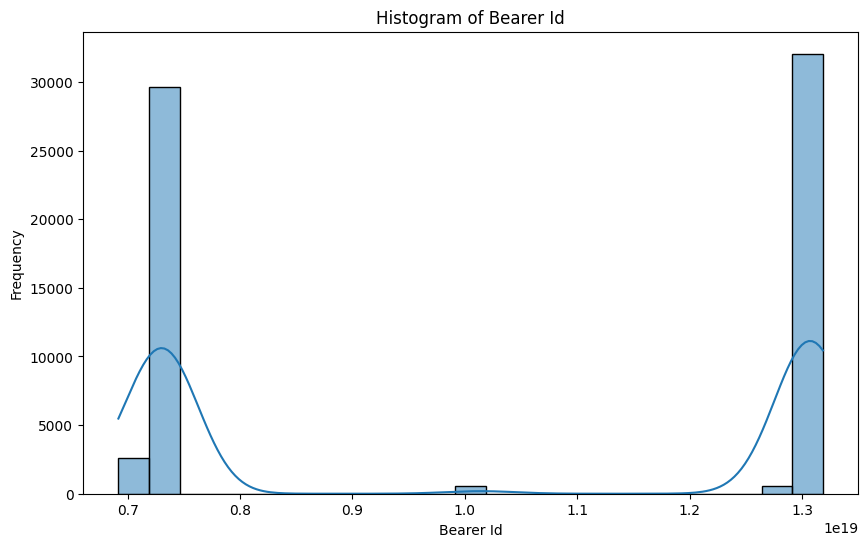

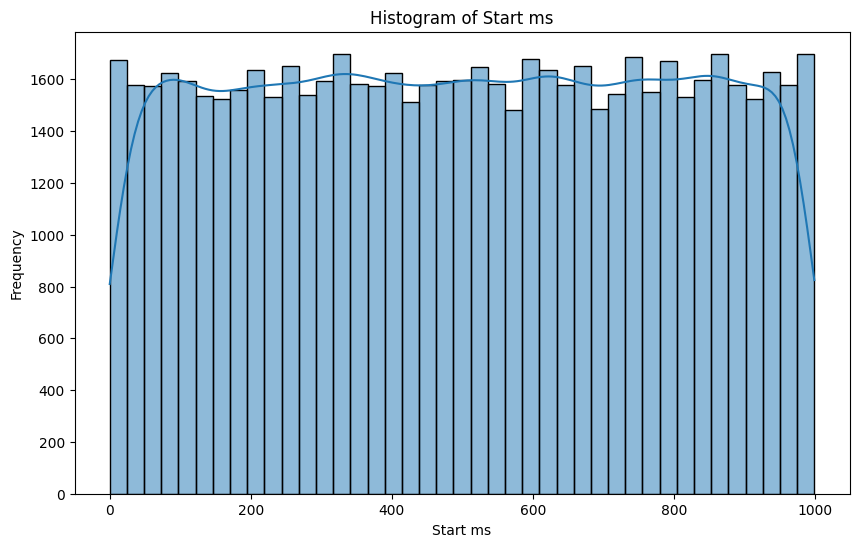

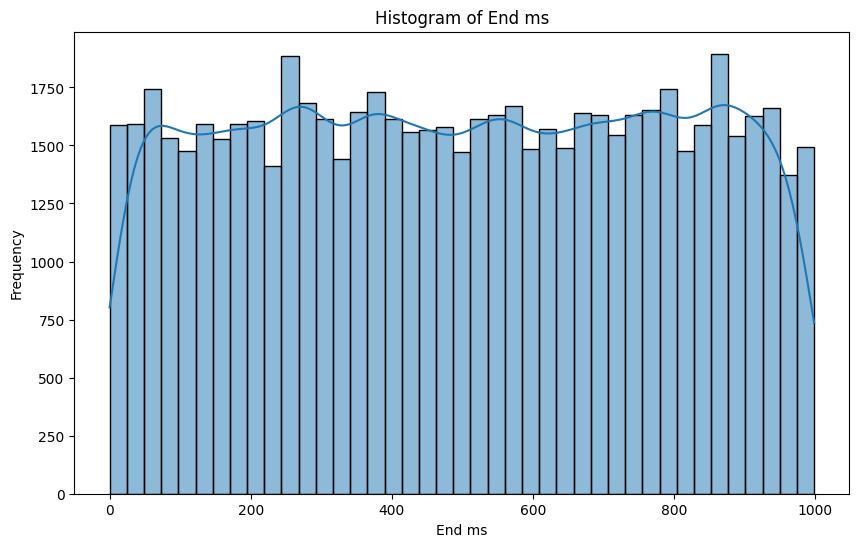

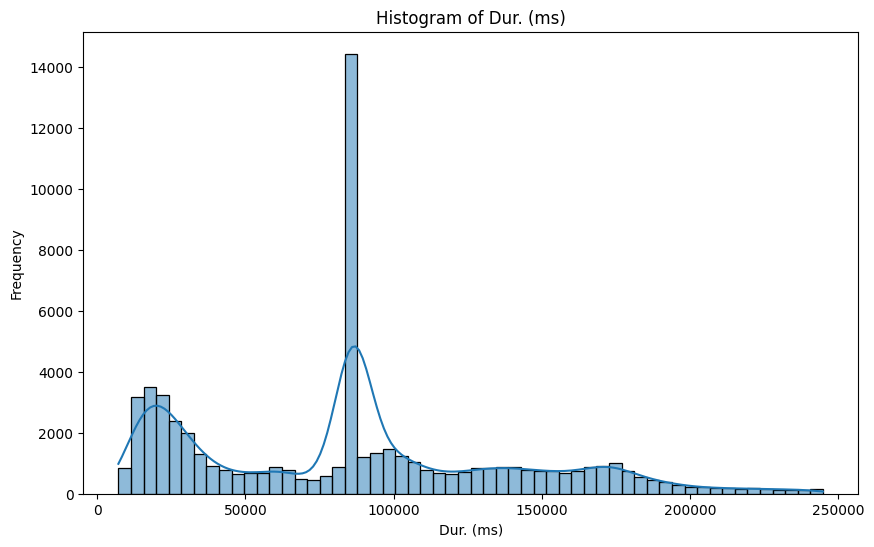

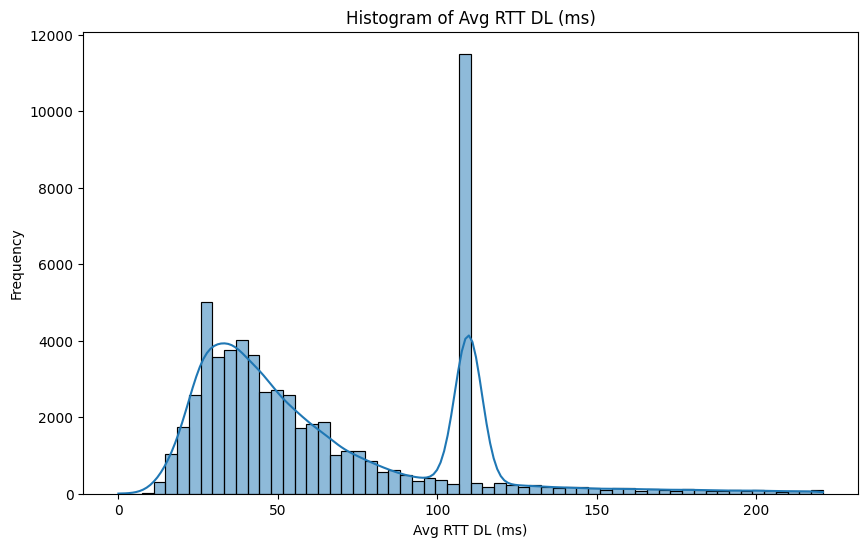

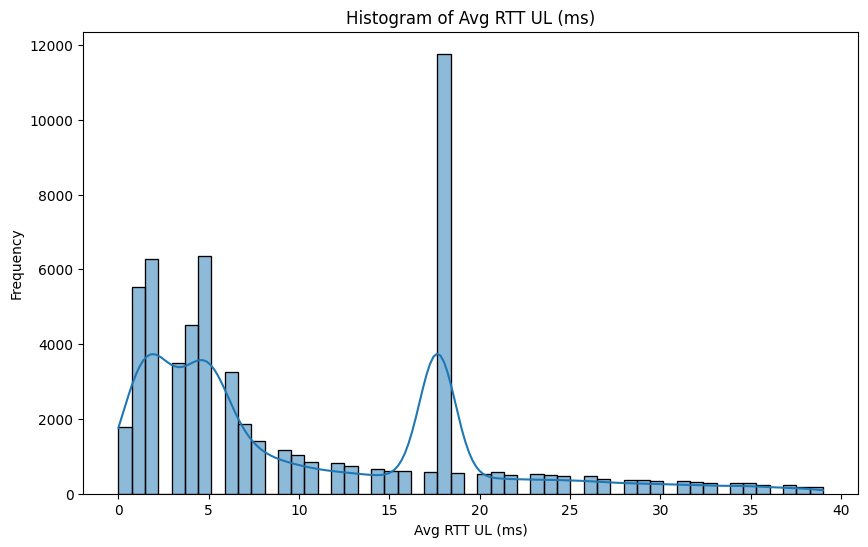

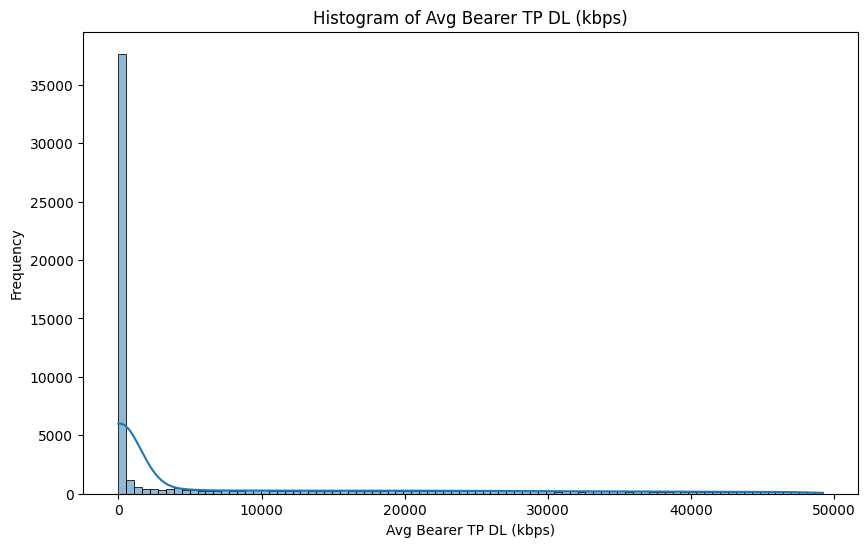

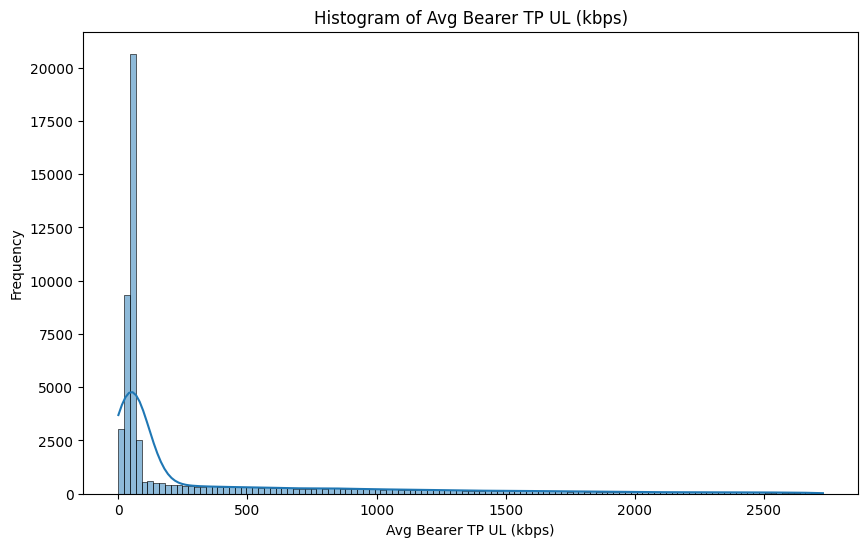

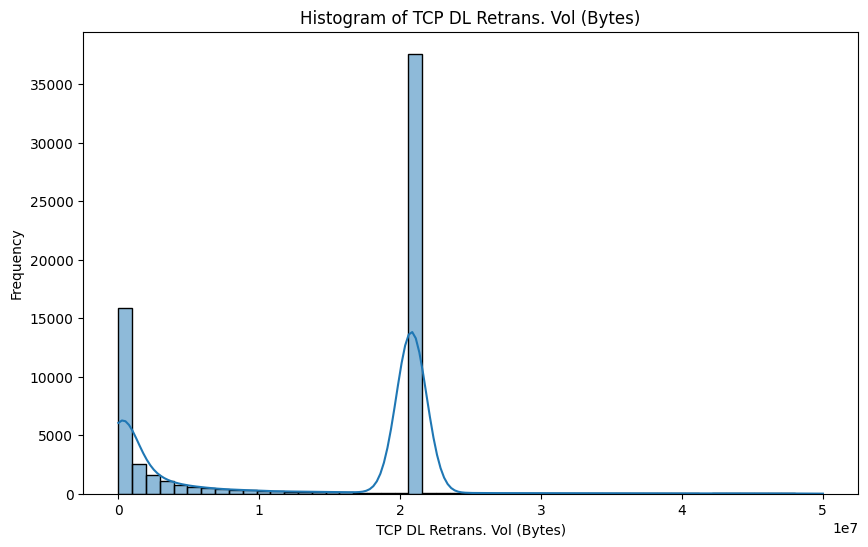

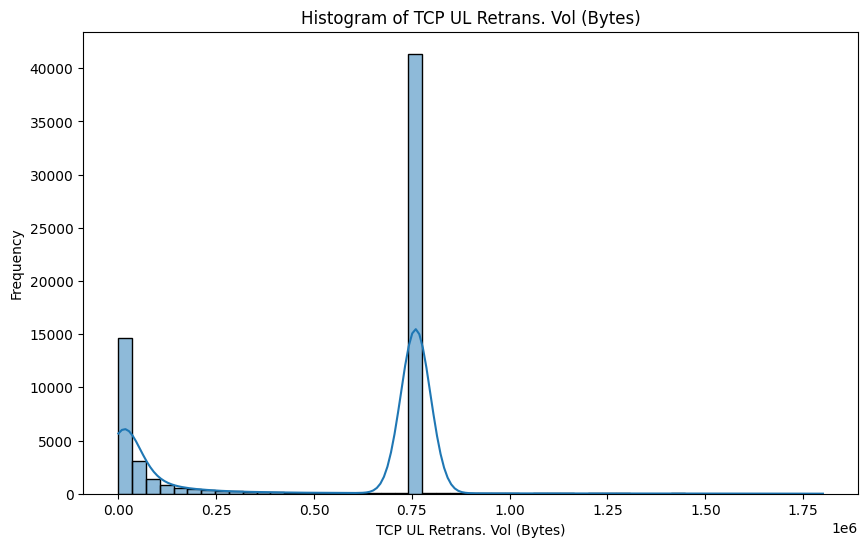

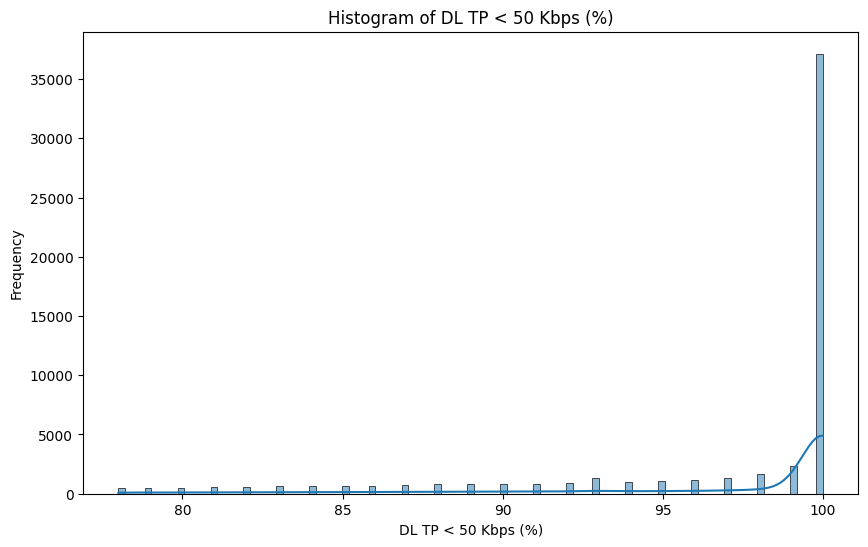

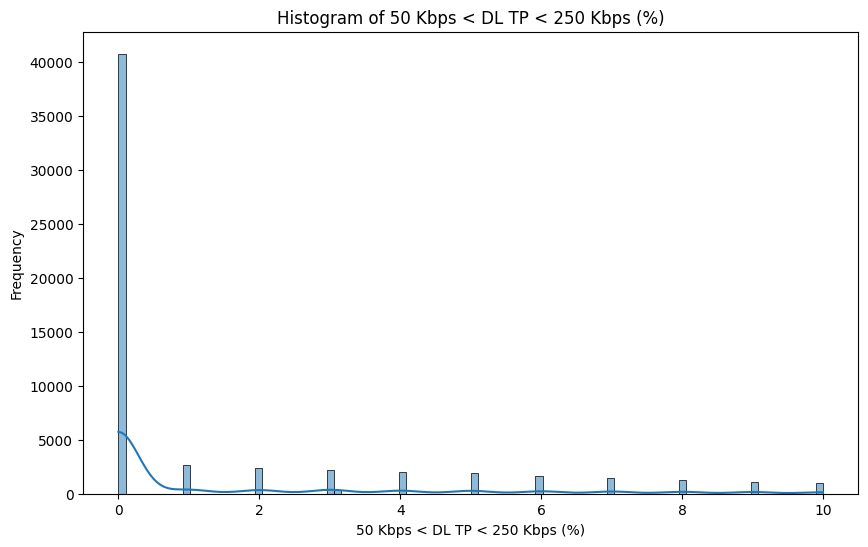

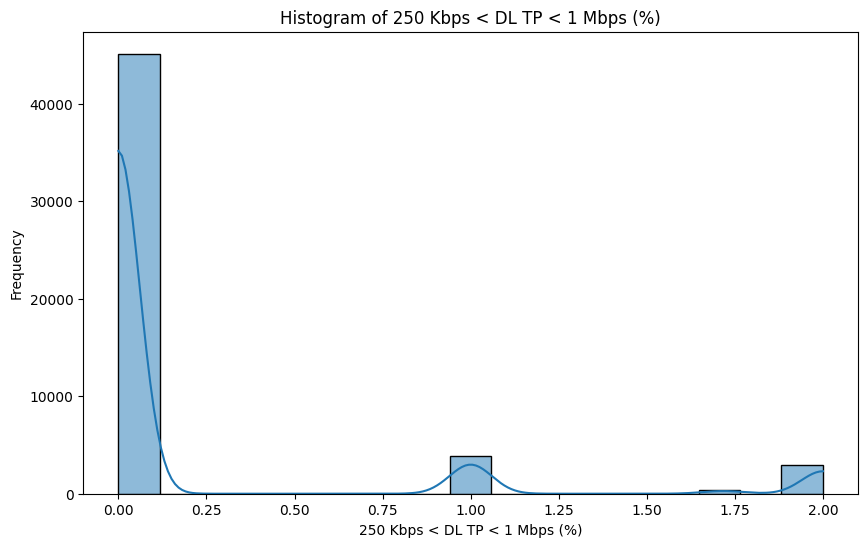

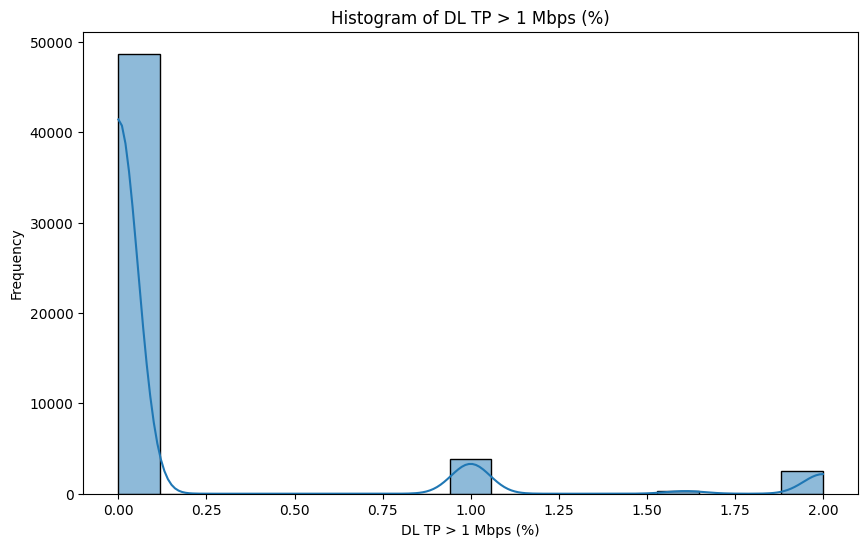

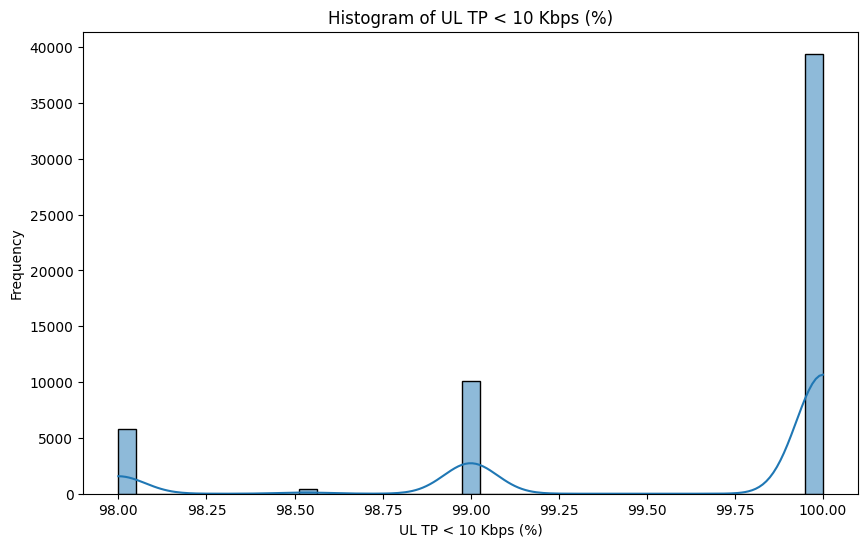

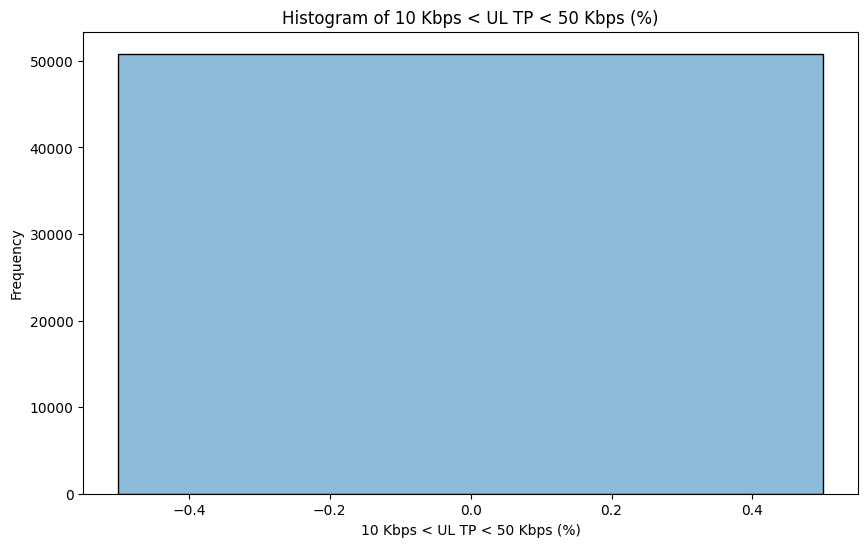

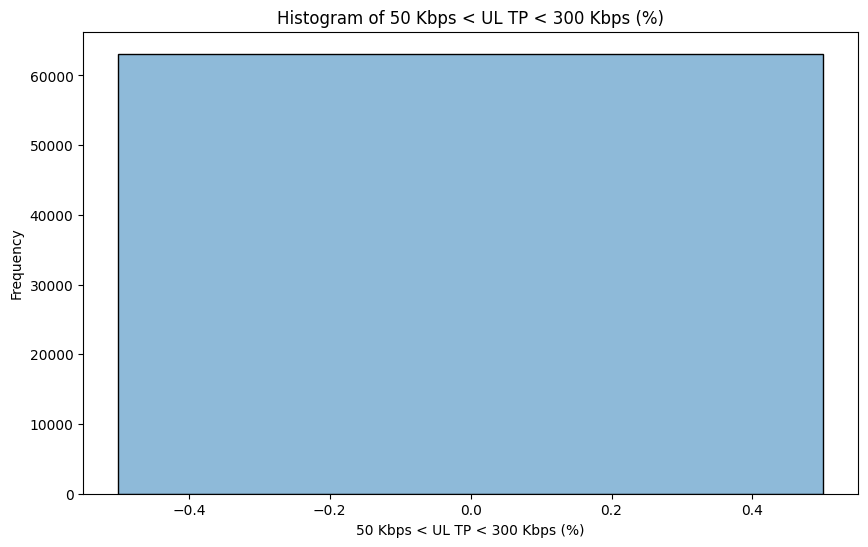

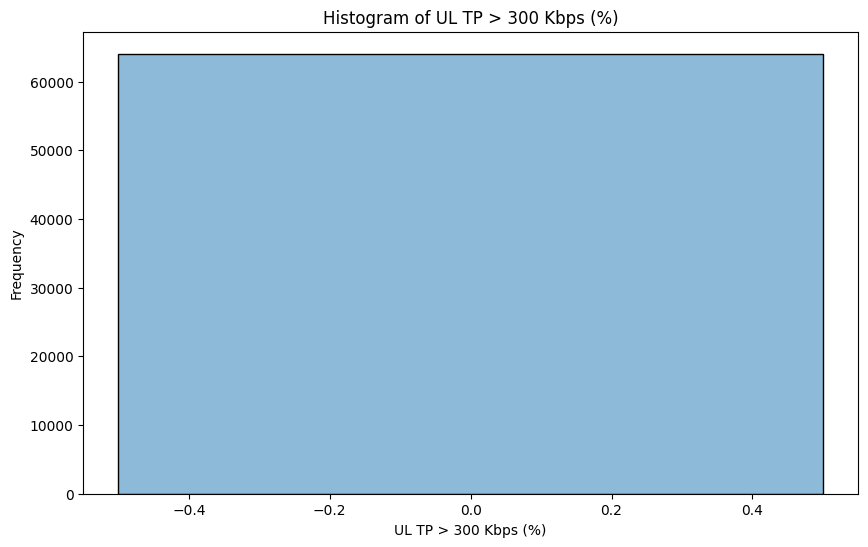

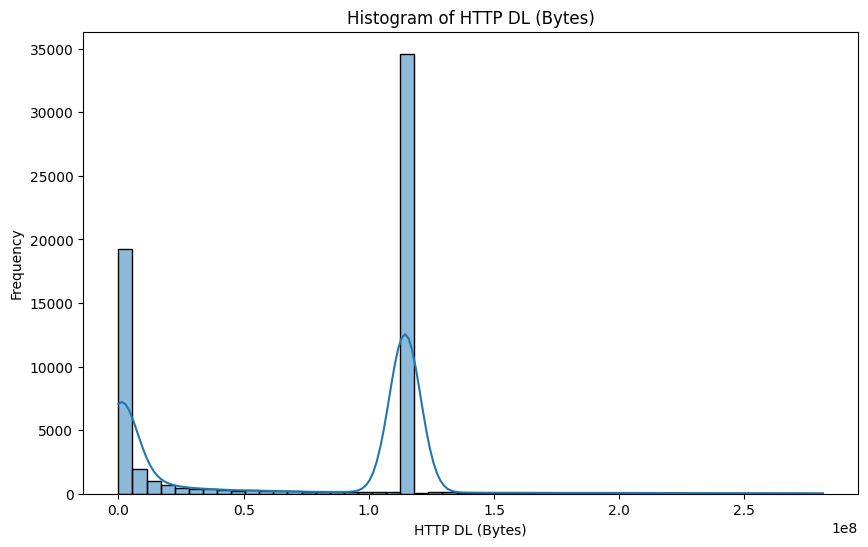

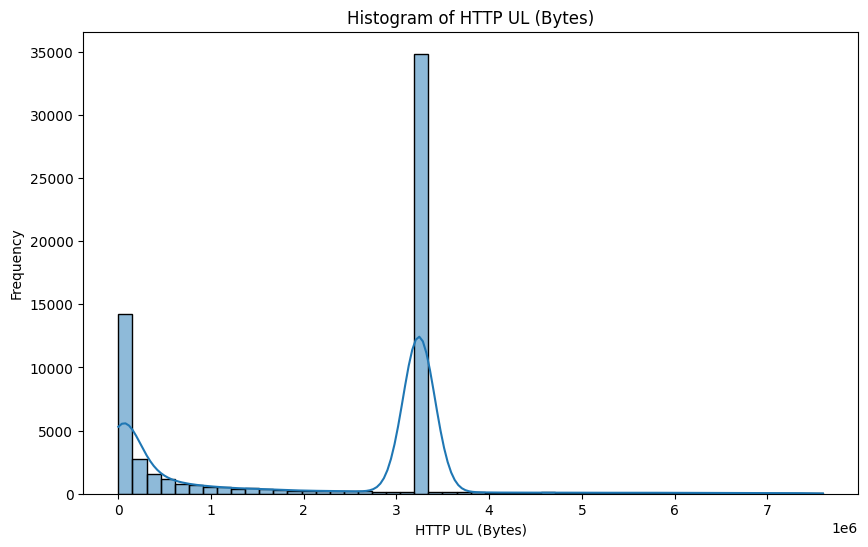

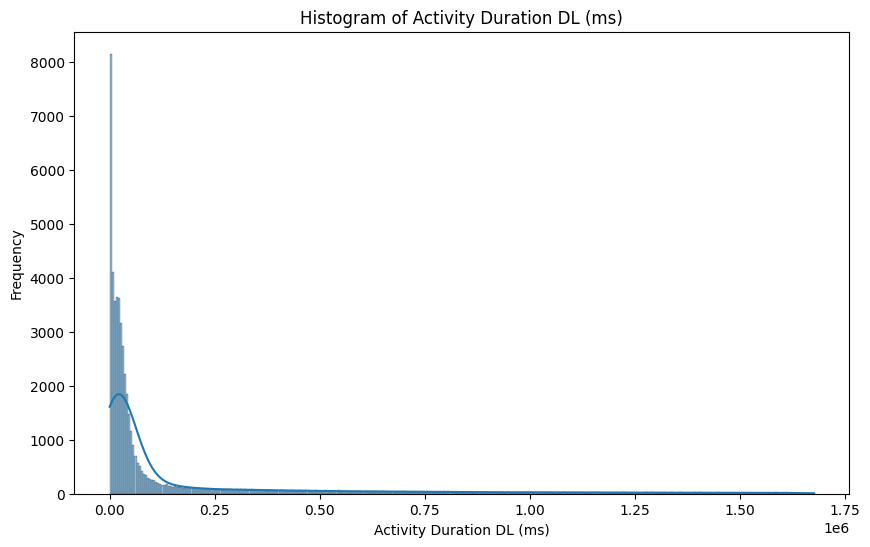

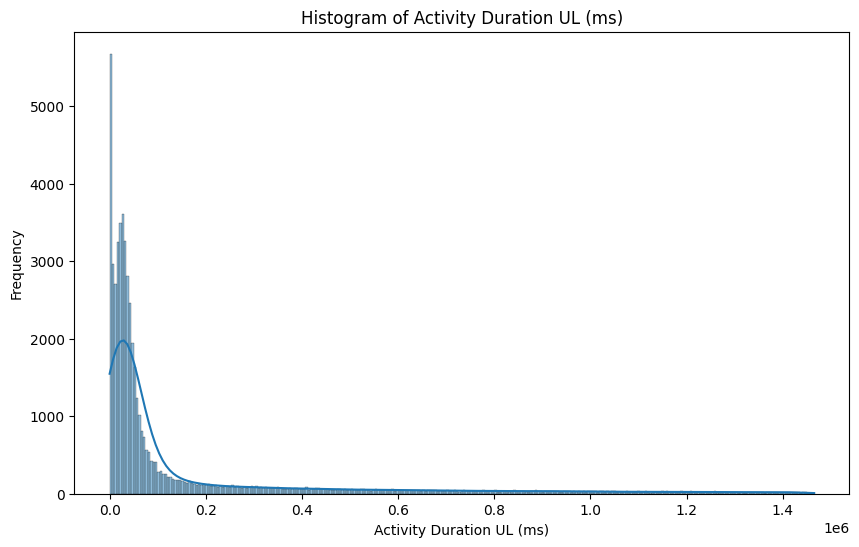

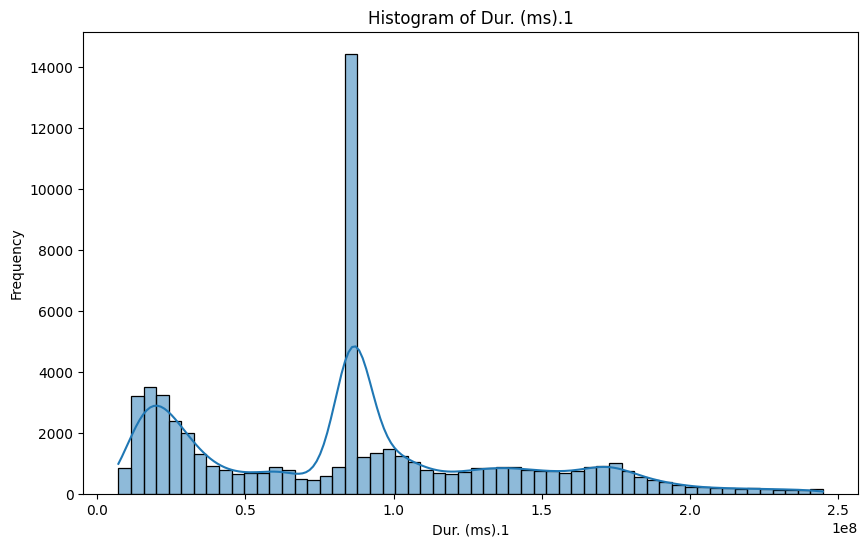

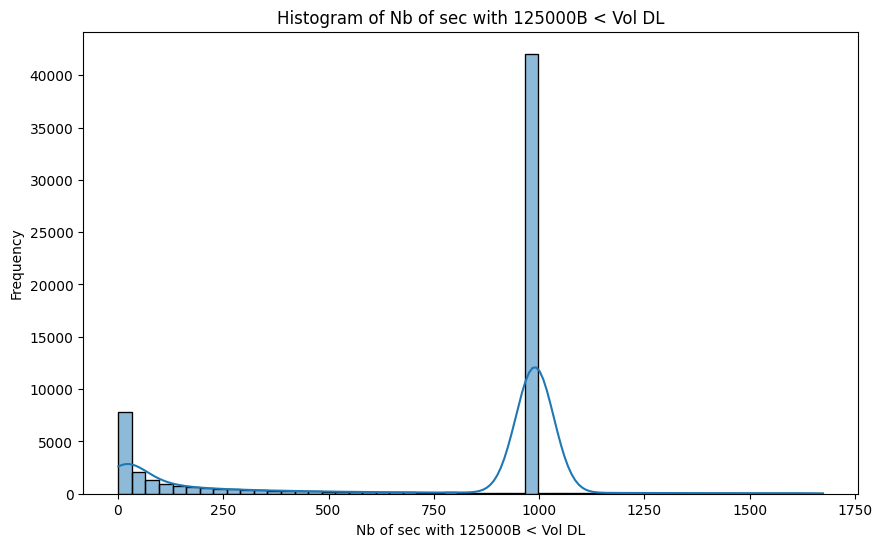

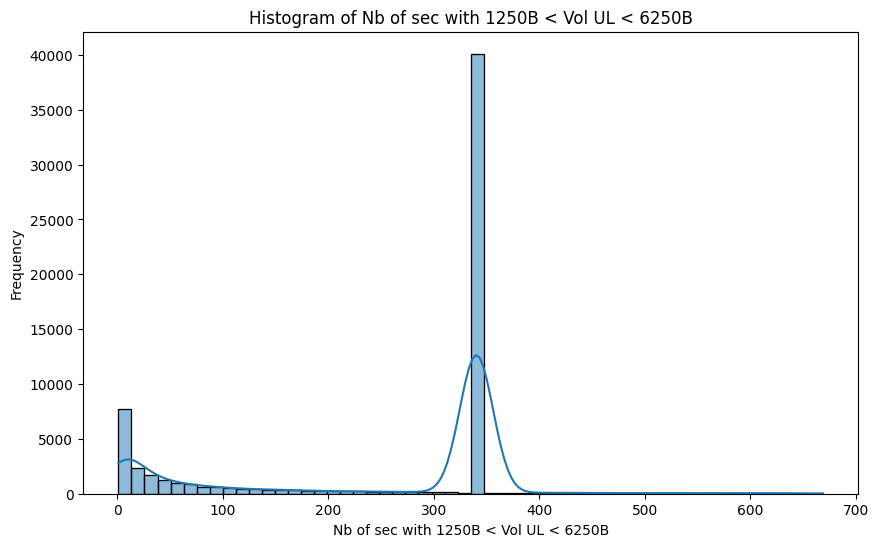

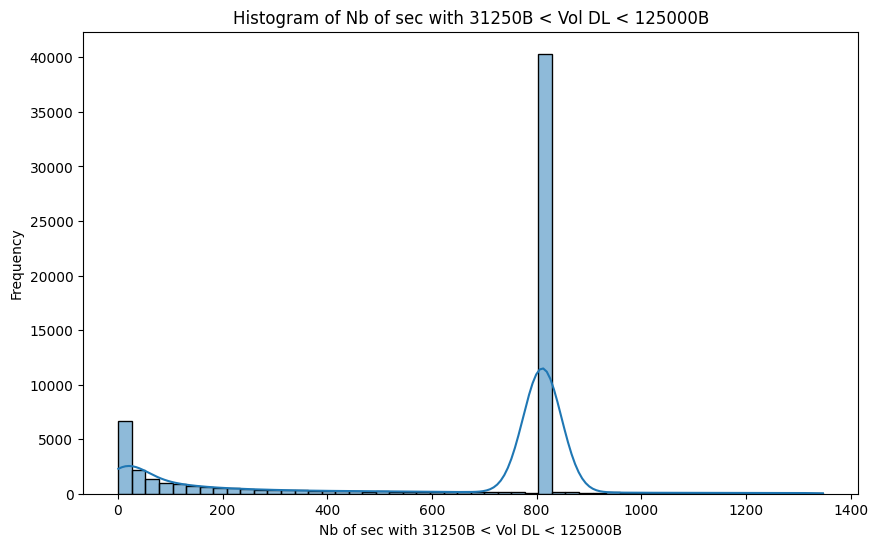

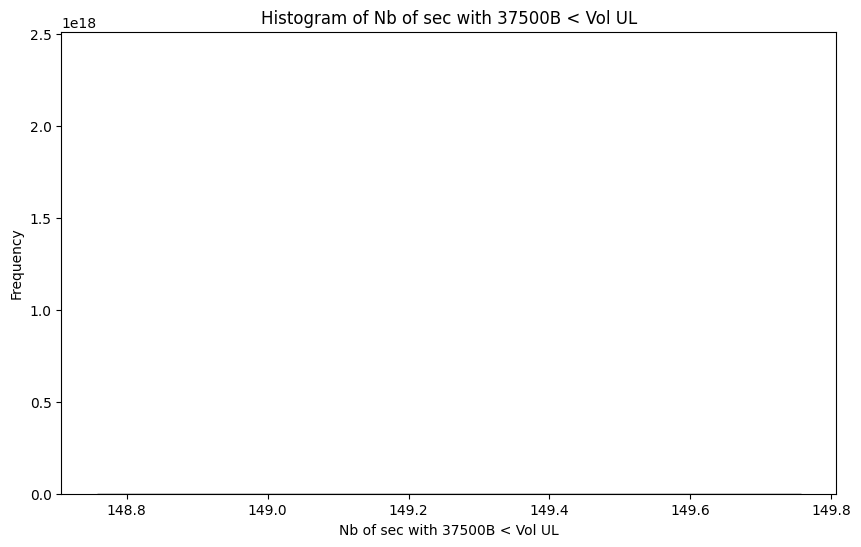

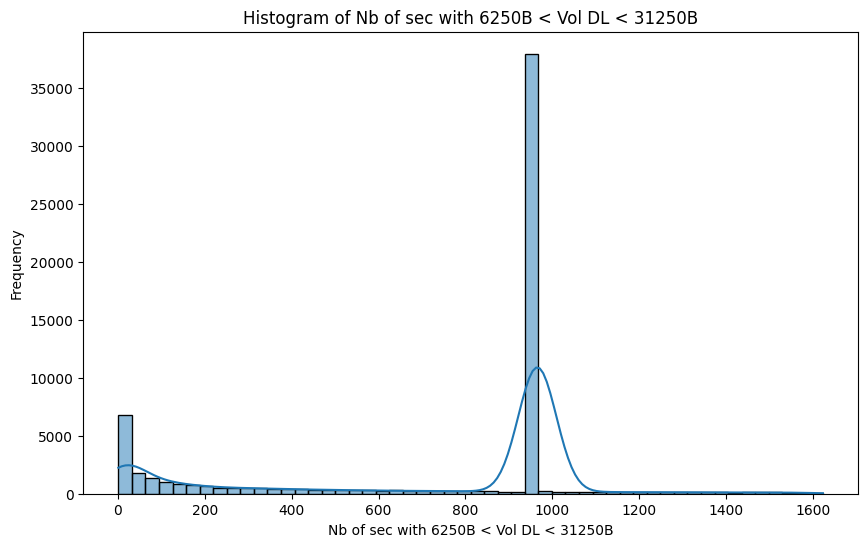

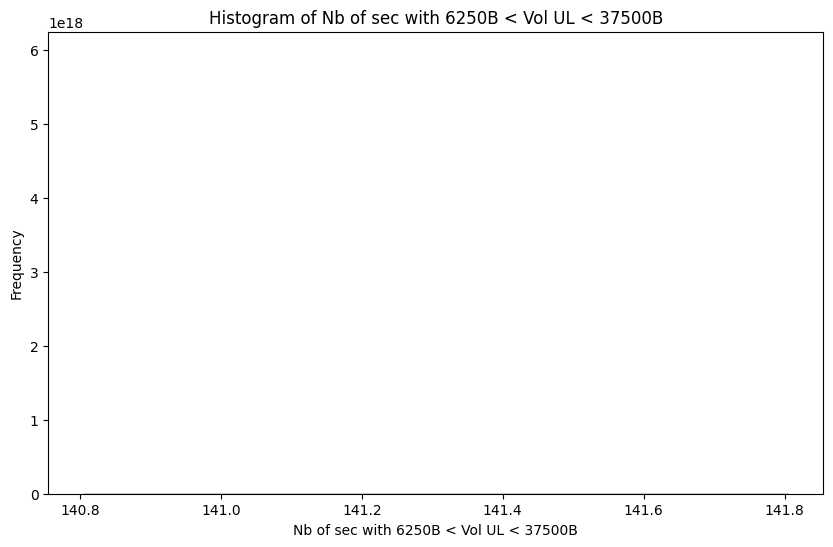

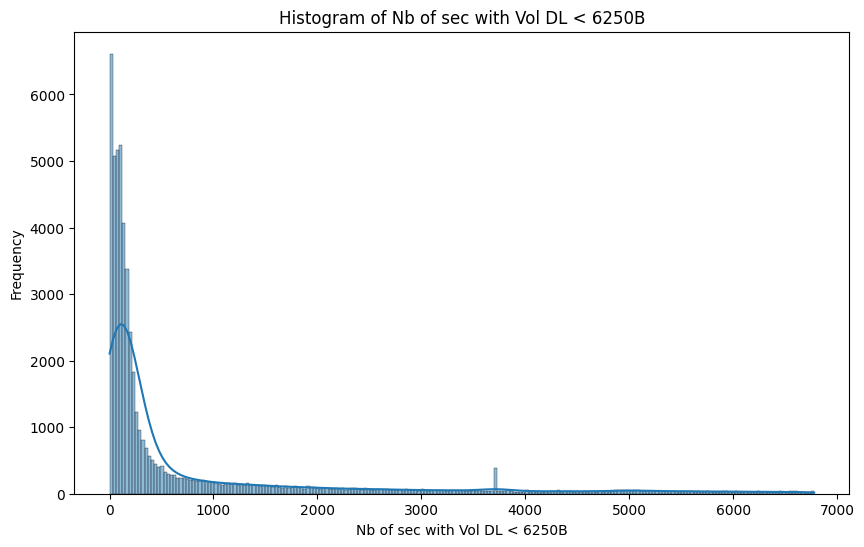

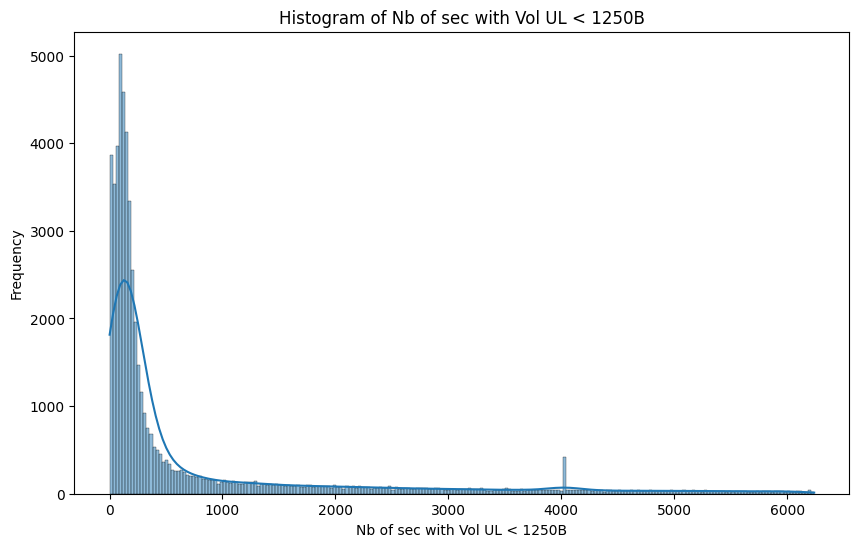

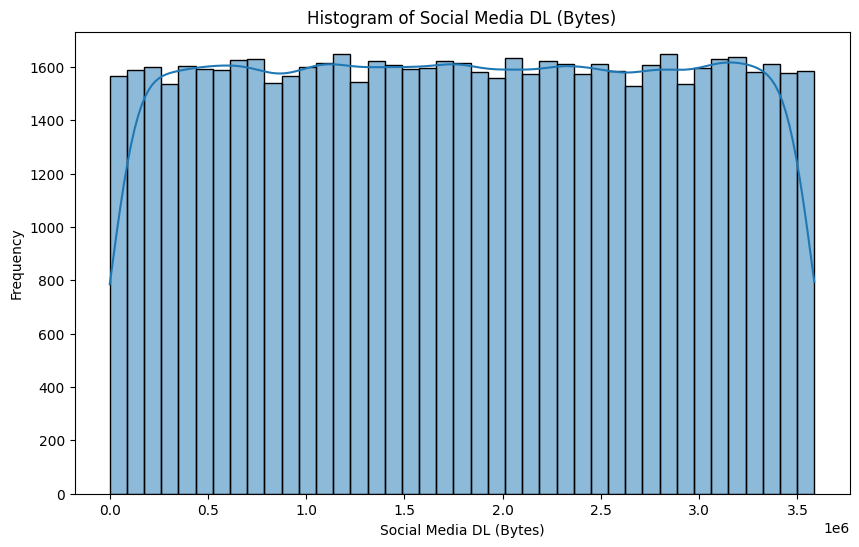

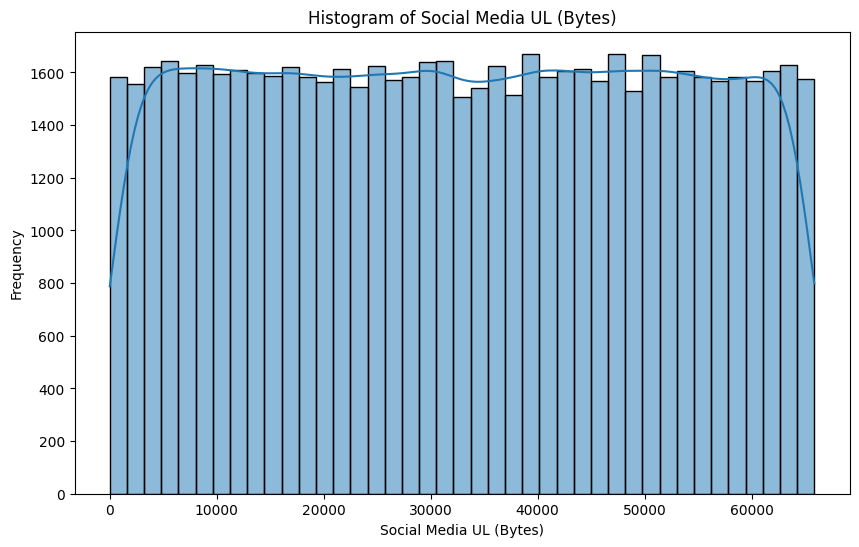

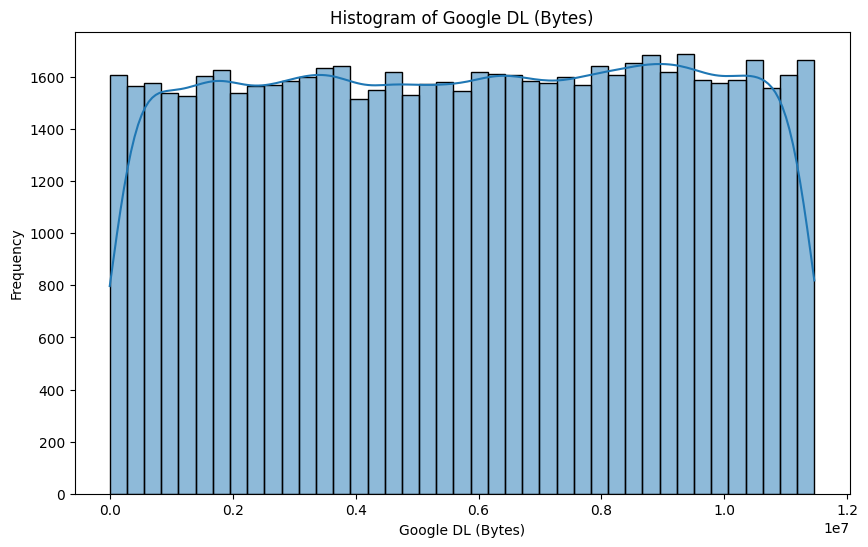

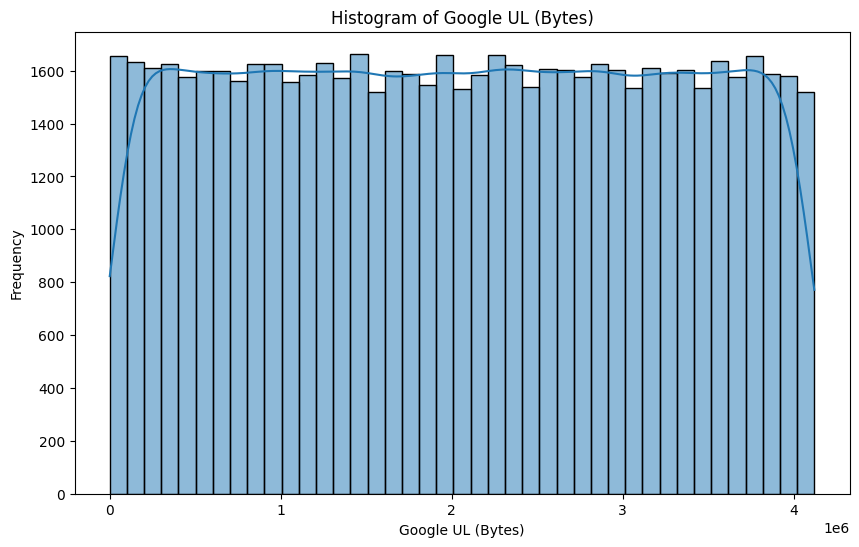

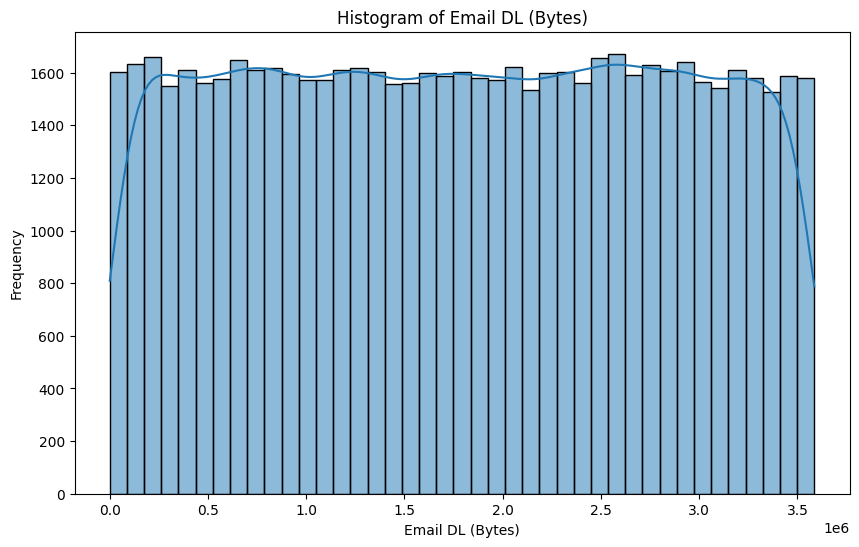

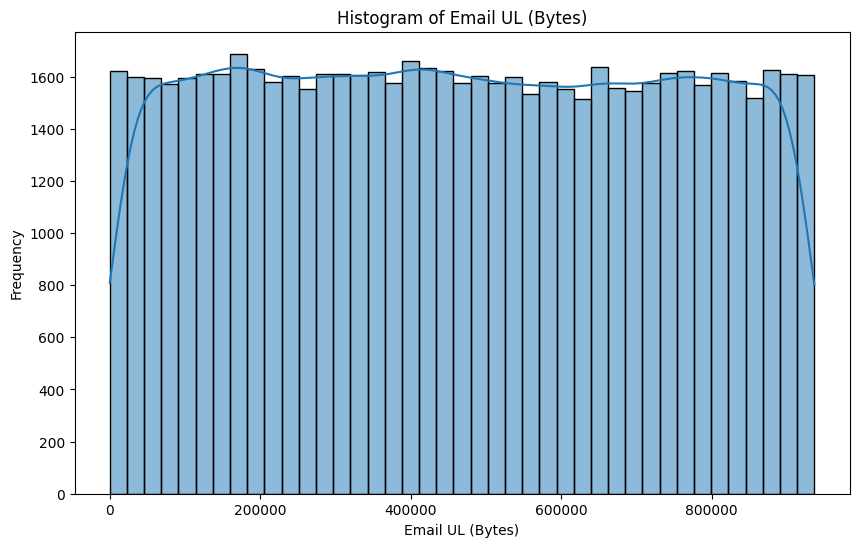

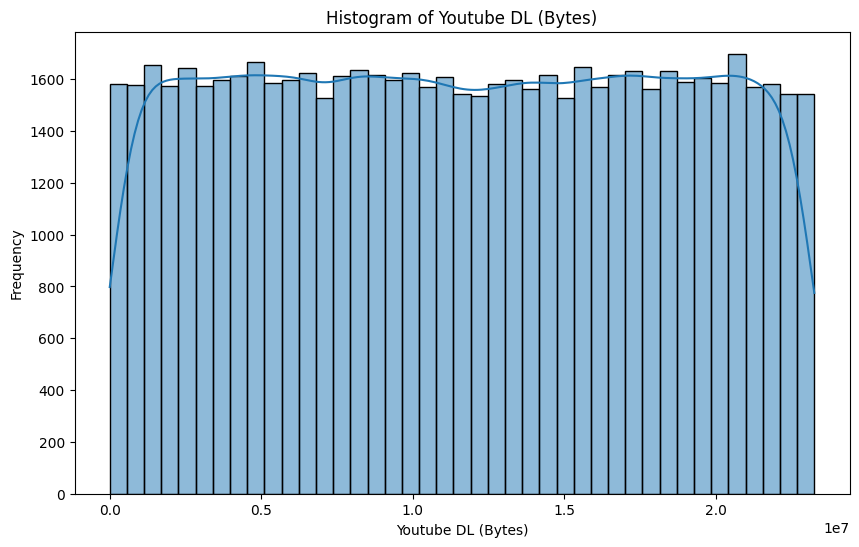

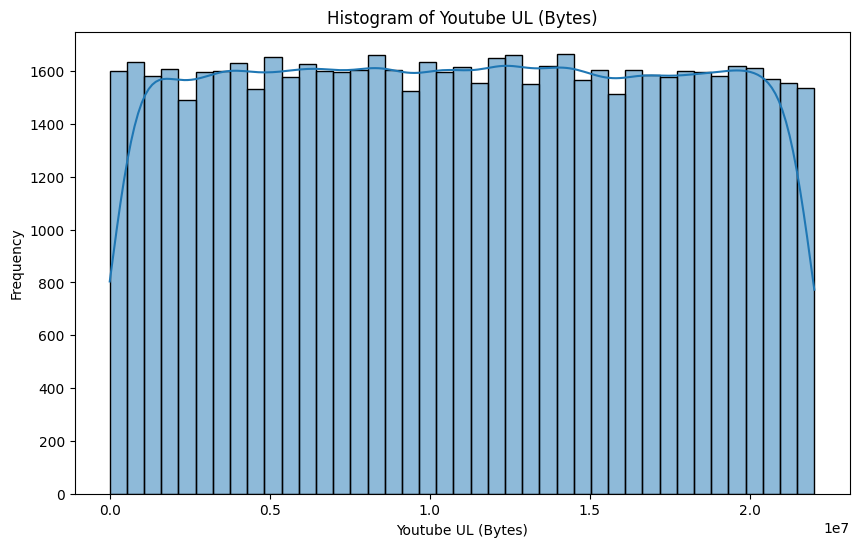

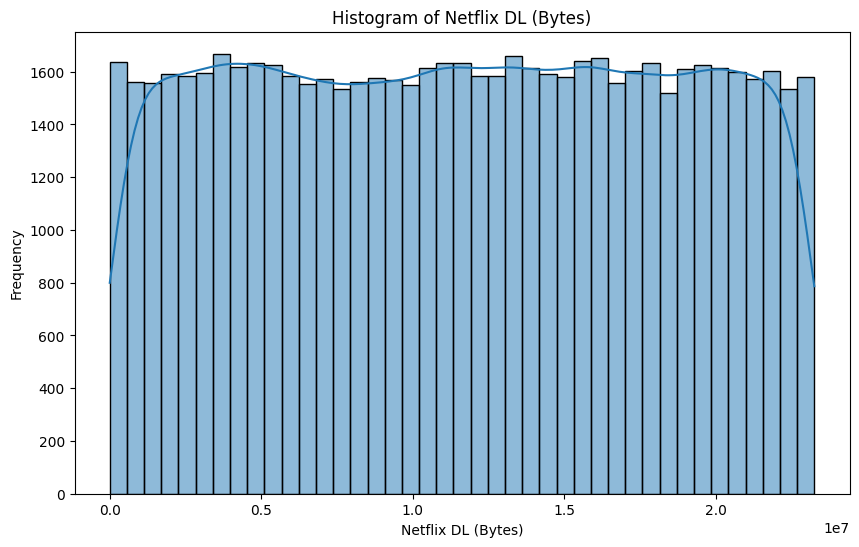

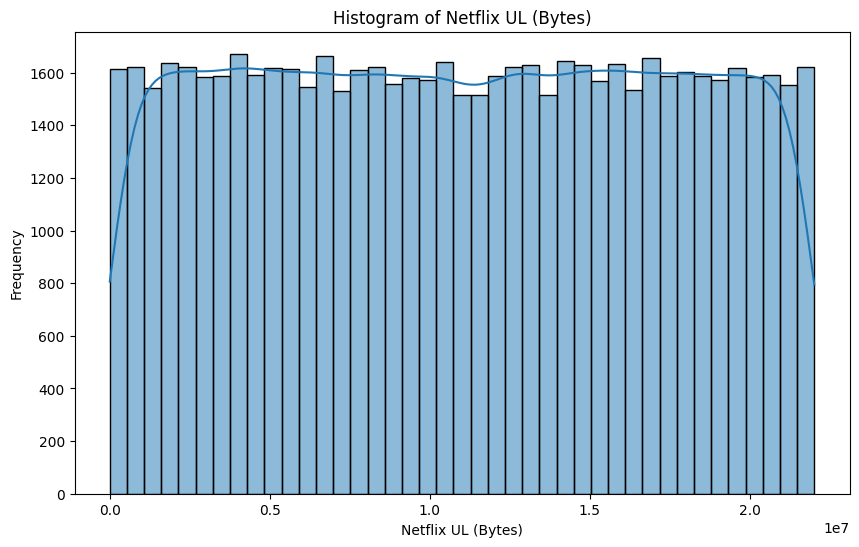

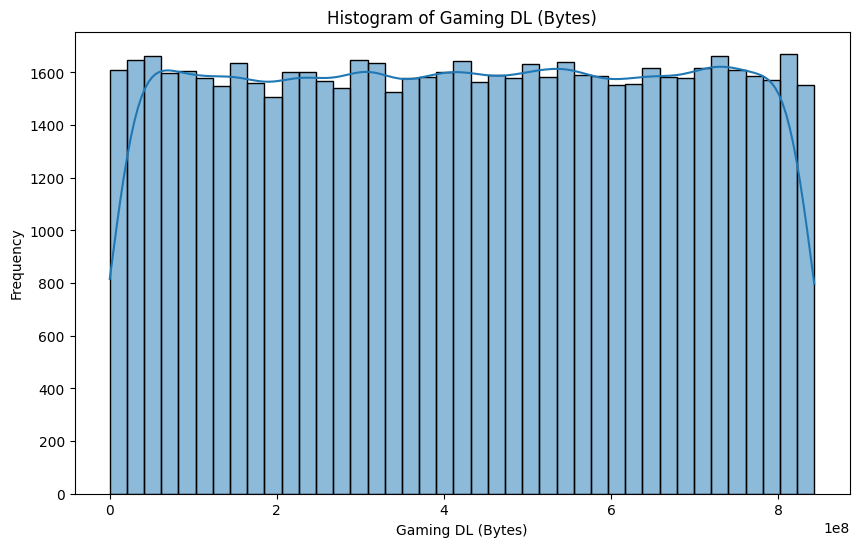

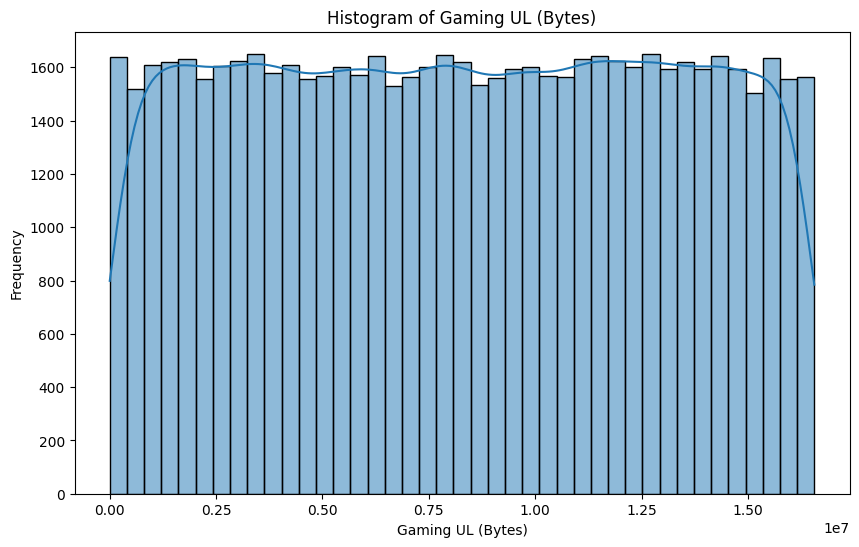

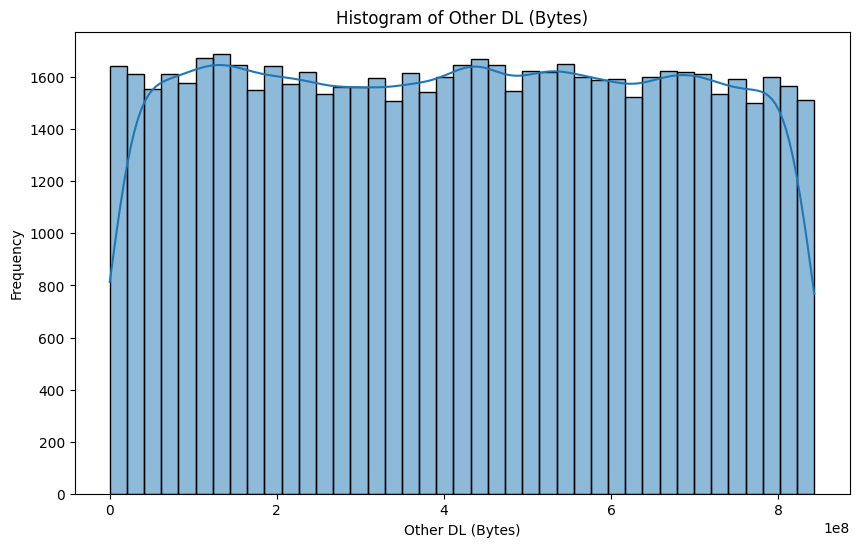

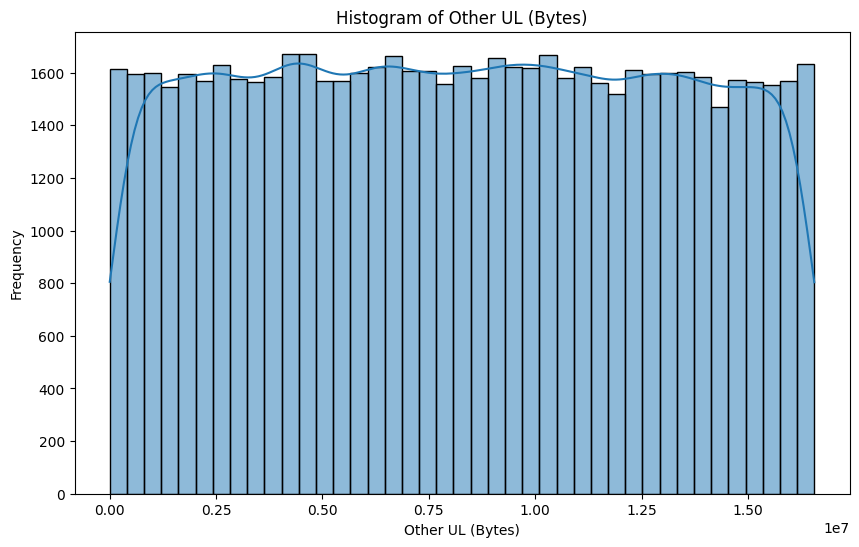

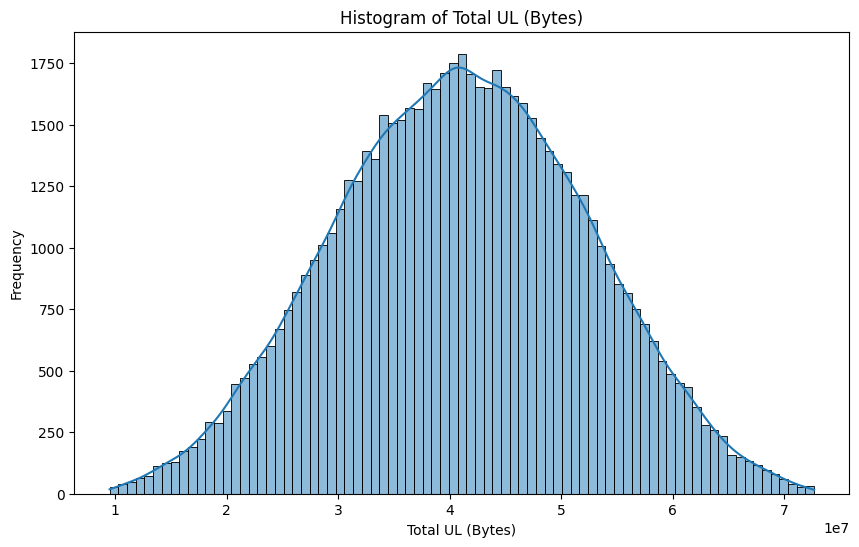

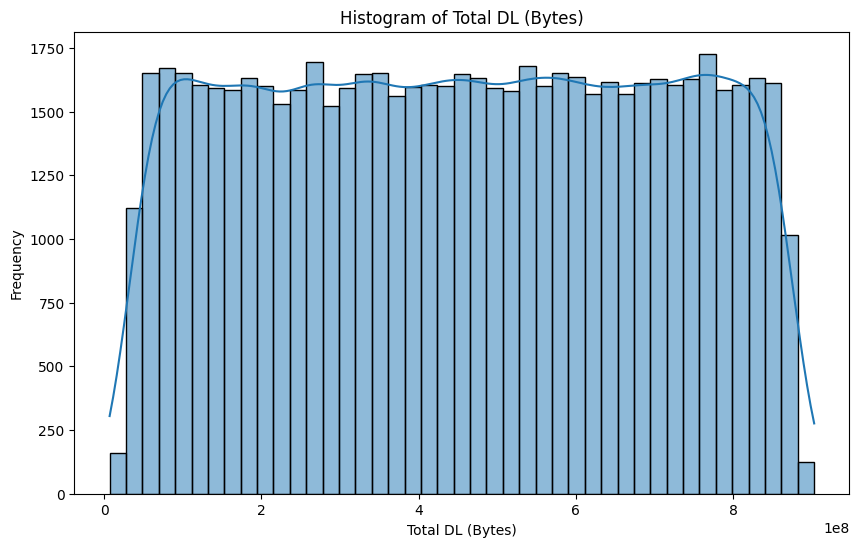

In [ ]:
# Filter DataFrame to include only numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Loop through each numeric column and plot a histogram
for column in numeric_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- # **Interpretation:**
- **YouTube:** High data usage, especially in downloads.
- **Netflix**: Significant usage, both for downloads and uploads.
- **Gaming**: Noticeable download and upload usage.
- **Other Applications**: Varies widely among entries.
- # **Recommendation:**
- **Identify Top Data Consumers:** Focus on applications with high data usage for better resource management.
- **Optimize for Popular Apps:** Ensure efficient data handling for YouTube and Netflix due to their high usage.
- **Monitor Anomalies:** Check entries with unusually high or low data usage for potential issues or insights.

# **Univariate Analysis for object Dtype**

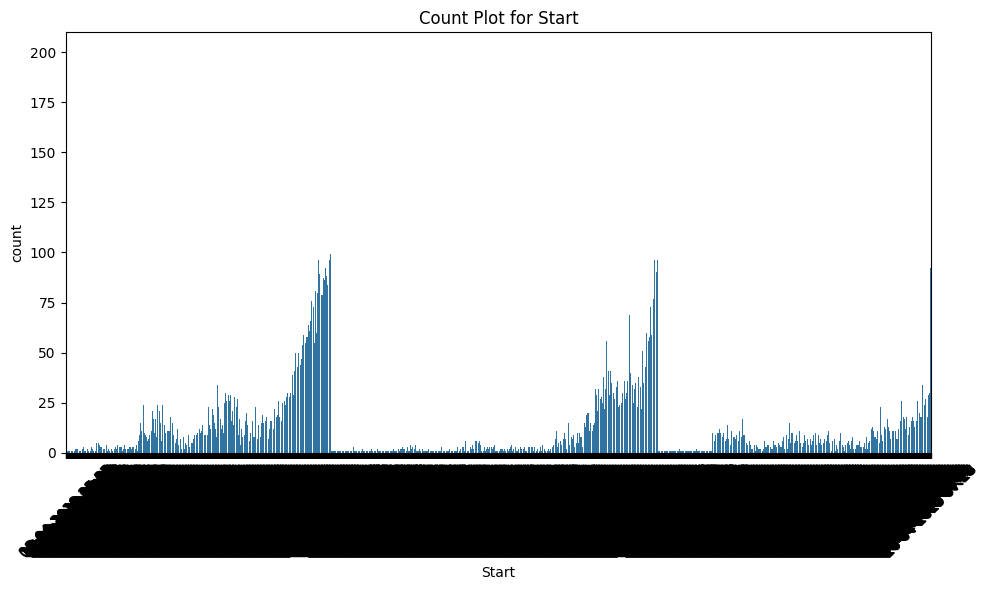

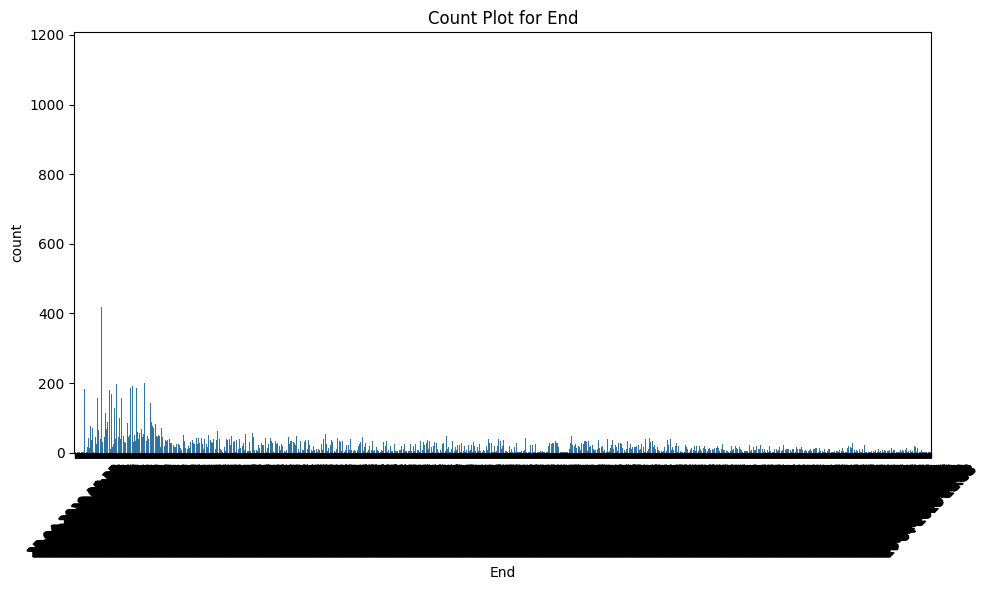

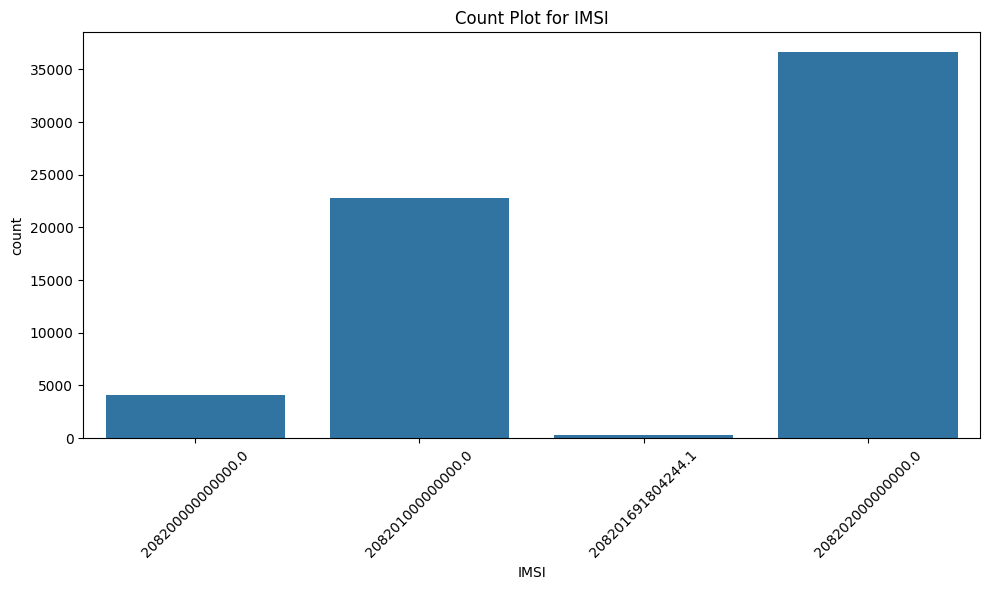

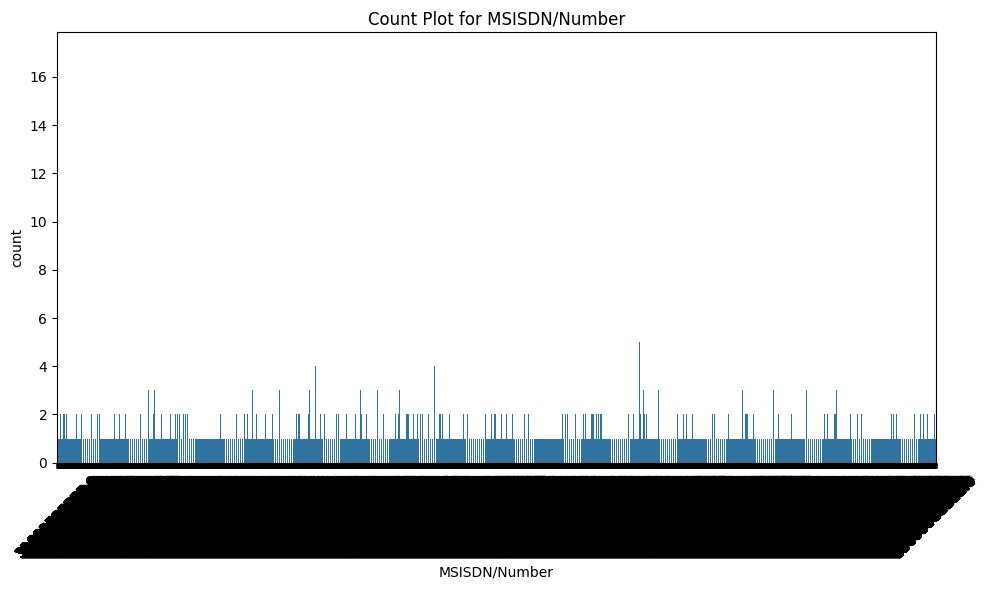

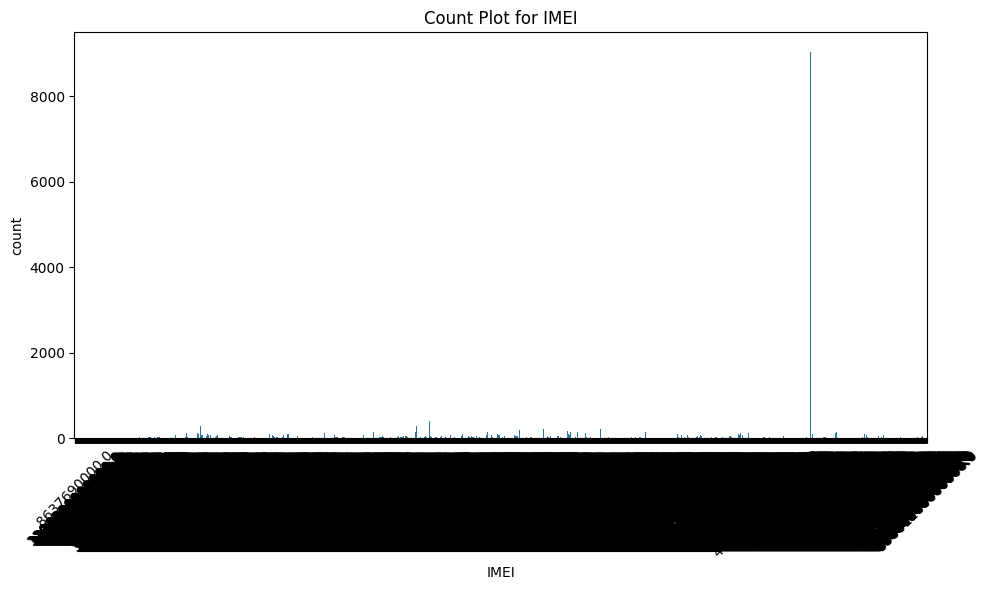

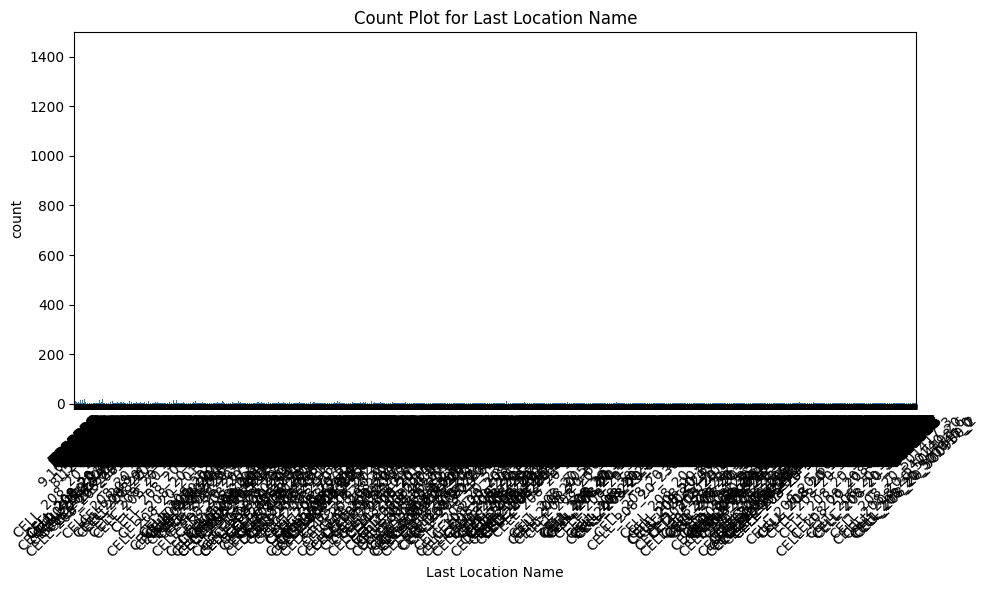

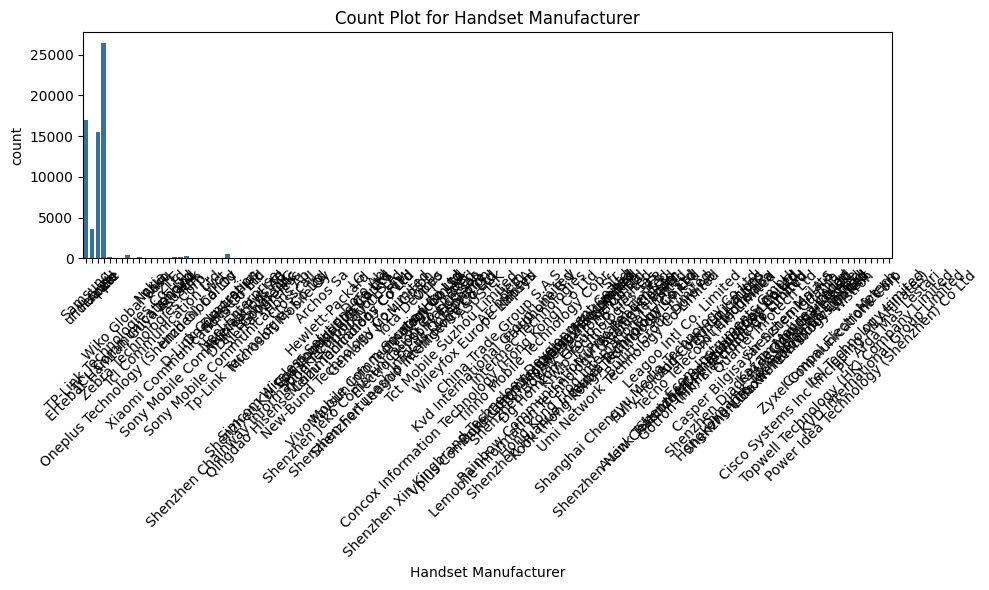

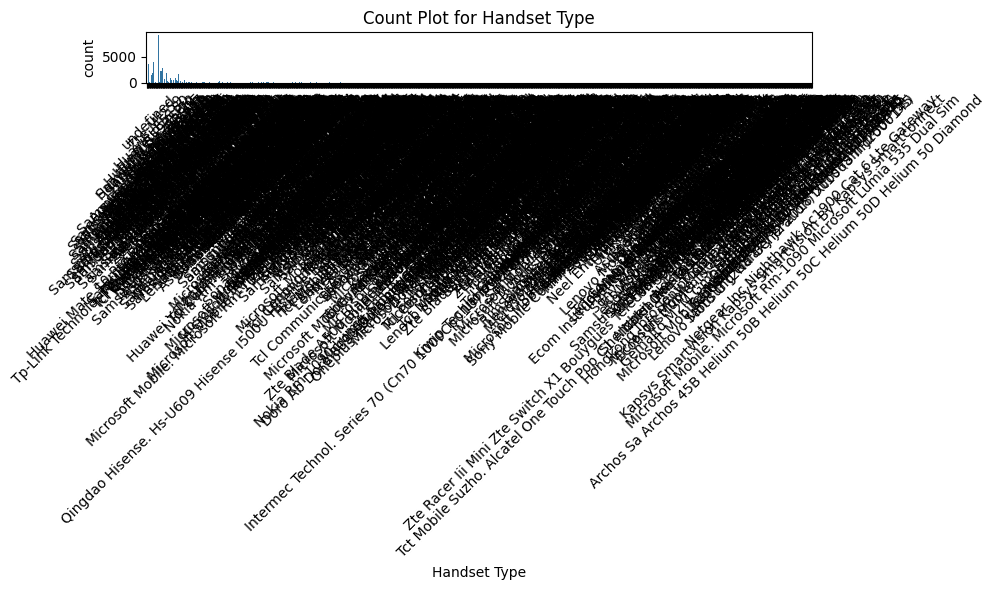

In [ ]:
# Select columns with categorical data
categorical_columns = df1.select_dtypes(exclude='float64').columns

# Plot count plots for the first 10 categorical columns
for col in categorical_columns[:10]:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df1, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Bi-Variate plots**

<Axes: xlabel='Last Location Name', ylabel='Netflix UL (Bytes)'>

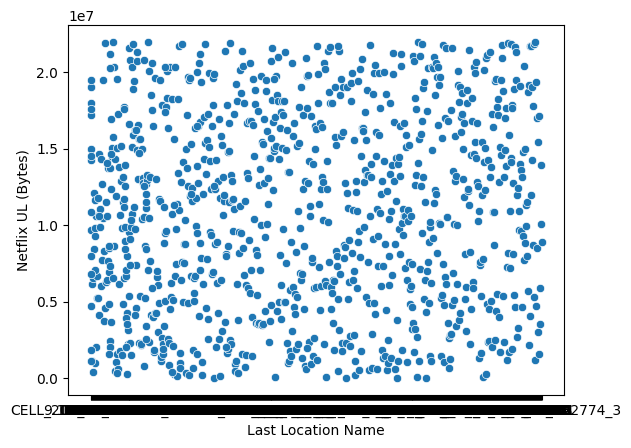

In [ ]:
sns.scatterplot(data=df1[:1000], x="Last Location Name",
                y='Netflix UL (Bytes)')

<Axes: xlabel='Handset Type', ylabel='Email DL (Bytes)'>

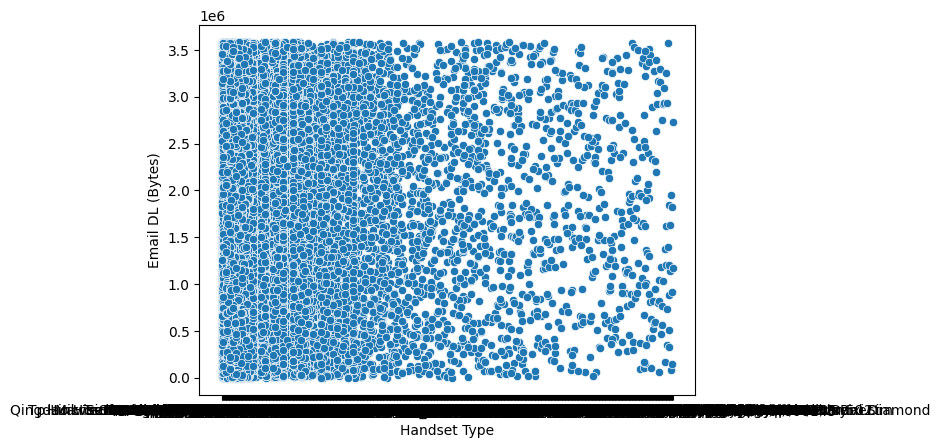

In [ ]:
sns.scatterplot(data=df1, x="Handset Type",
                y='Email DL (Bytes)')

<Axes: xlabel='Handset Type', ylabel='Netflix DL (Bytes)'>

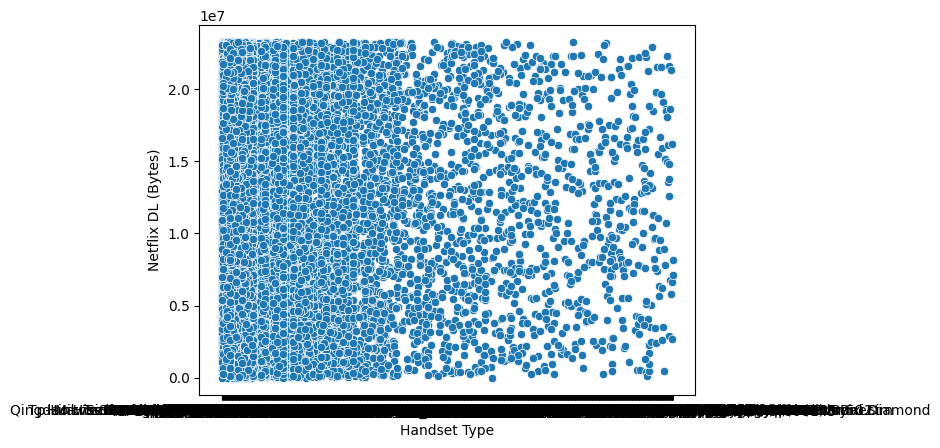

In [ ]:
sns.scatterplot(data=df1, x="Handset Type",
                y='Netflix DL (Bytes)')

# **User Segmentation into Top Five Decile Classes**

In [ ]:
user_segmentation = df1.groupby(['MSISDN/Number']).agg(
    {'Dur. (ms)': 'sum', 'Total DL (Bytes)': 'sum', 'Total UL (Bytes)':'sum'})

user_segmentation['total data'] = user_segmentation['Total DL (Bytes)'] + \
    user_segmentation['Total UL (Bytes)']
user_segmentation = pd.DataFrame( user_segmentation).reset_index()

user_segmentation['decile_rank'] = pd.qcut(user_segmentation['Dur. (ms)'], 10, labels=False)
user_segmentation = user_segmentation.groupby(['decile_rank']).agg(
    {'total data': 'count'}).reset_index()
user_segmentation

decile_rank  total data
0            0        4439
1            1        4438
2            2        4438
3            3        4457
4            4        5186
5            5        3672
6            6        4438
7            7        4439
8            8        4437
9            9        4439

**Key Observations
Distribution**

The total data varies across decile ranks from 3,672 to 5,186.
There is a noticeable peak at decile rank 4 with 5,186 data points, which is the highest.
- **Consistency:**

Most decile ranks have similar values, with a few exceptions.
Ranks 0, 1, 2, 6, 7, 8, and 9 are relatively consistent, all around 4,400 data points.
- **Variation:**

Decile rank 5 shows a significant drop with 3,672 data points, which is the lowest.
The variation in total data across ranks indicates that the distribution is not uniform and has some peaks and troughs.
- **Potential Insights:**

The peak at decile rank 4 may indicate a higher concentration of data or an area of interest.
The drop at decile rank 5 might require further investigation to understand any underlying causes or anomalies.

# **Correlation**

<Axes: >

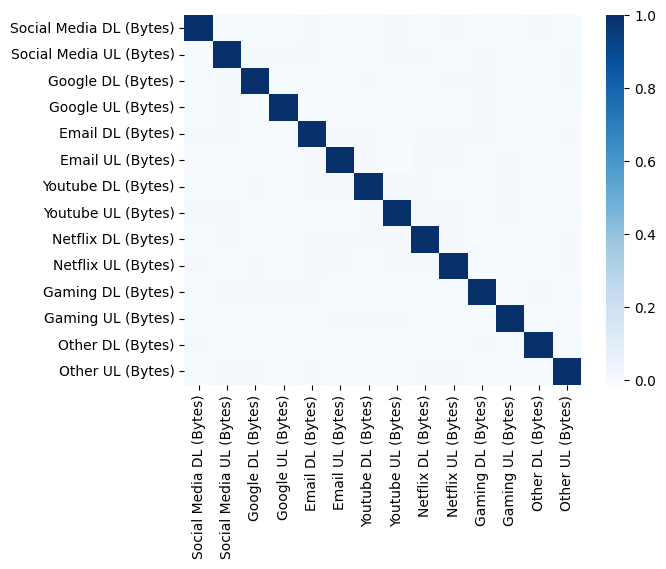

In [ ]:
corr = df1[['Social Media DL (Bytes)','Social Media UL (Bytes)',
 'Google DL (Bytes)', 'Google UL (Bytes)',
'Email DL (Bytes)', 'Email UL (Bytes)',
'Youtube DL (Bytes)','Youtube UL (Bytes)',
'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
'Other DL (Bytes)', 'Other UL (Bytes)']].corr()

# plot the heatmap
sns.heatmap(corr,cmap='Blues',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

# **Dimensionality reduction**

In [ ]:
numeric_df = df1.select_dtypes(include='float64')
numeric_df.shape

(65397, 47)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Impute missing values (replace NaNs) using the mean of each column
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# You must normalize the data before applying the fit method
# Handle potential zero standard deviation to avoid NaNs
epsilon = 1e-8  # Small value to avoid division by zero
df_normalized = (numeric_df_imputed - numeric_df_imputed.mean()) / (numeric_df_imputed.std() + epsilon)

pca = PCA(n_components=numeric_df_imputed.shape[1])
principalDf = pca.fit_transform(df_normalized)

# # Reformat and view results
# loadings = pd.DataFrame(pca.components_.T,
#                             columns=['PC%s' % _ for _ in range(
#                                 len(df_normalized.columns))],
#                         index=numeric_df.columns)
# loadings.head(50)
principalDf = pd.DataFrame(data=principalDf, columns=['PC%s' % _ for _ in range(
                                    len(df_normalized.columns))])
principalDf

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0     -2.526302 -0.495612  0.322056 -0.913099 -0.005964  0.089960  0.626685   
1     -2.318469  0.037567  0.009445  1.974894 -0.054570  0.464858  0.217194   
2     -2.317474  0.514349 -0.052262 -1.941122 -1.161709  1.206139 -0.578173   
3     -2.465865  0.956878 -1.579327  1.475706 -1.256315  0.905991 -0.627835   
4     -2.361497  0.740621 -0.607943  0.091486 -1.159844  1.093112 -0.247403   
...         ...       ...       ...       ...       ...       ...       ...   
65392 -2.679266 -0.434423  1.729034  0.678143 -0.011817 -0.170617  0.258163   
65393 -2.452153 -1.264315  1.626644  1.455557 -0.059376 -0.182307  0.646936   
65394 -2.365900 -0.197803  1.423115  1.827617 -1.269471  1.015631  0.335363   
65395 -2.709590 -0.362880 -0.399124 -1.146345  1.103787 -0.490423  0.903038   
65396  0.011886  0.141596  0.045643 -0.029217 -0.217665  0.094616  0.093177   

            PC7       PC8       PC9  ...      PC37      PC38      PC39  \
0     -0.922531  0.167533  0.663502  ... -0.003355 -0.013312  0.002089   
1      0.454445 -0.585462 -0.911897  ... -0.013380 -0.011890 -0.005316   
2      0.876279  1.198549 -0.134353  ... -0.008529 -0.034482  0.006355   
3      0.912127 -0.667834  0.028515  ...  0.020096 -0.013750 -0.003256   
4     -1.225719  0.948223 -1.623213  ... -0.005785 -0.023535 -0.000572   
...         ...       ...       ...  ...       ...       ...       ...   
65392 -0.070347 -0.556682 -0.607839  ...  0.017132 -0.014052 -0.009103   
65393  1.715567  0.750115 -0.485181  ...  0.001559  0.000998 -0.007555   
65394 -0.540906  0.339933  0.642307  ...  0.026144 -0.021369 -0.009077   
65395 -0.455350  0.162548 -0.160585  ...  0.021336 -0.008606  0.004170   
65396 -2.388073  0.068649  0.063170  ...  0.000304  0.003825 -0.001217   

               PC40          PC41          PC42          PC43          PC44  \
0      4.146880e-07  4.949615e-08 -1.449208e-14  1.588322e-16 -1.553422e-17   
1      5.166770e-07  6.253038e-08  9.089012e-15 -5.614538e-17  3.484396e-16   
2      3.096891e-07  1.326524e-07 -4.669163e-15  2.914700e-16 -5.980539e-17   
3      3.148634e-07  1.295580e-07 -1.047618e-14  1.677273e-16 -9.570535e-17   
4      7.544323e-08  1.302995e-07 -4.484642e-15  2.616489e-16  7.385525e-17   
...             ...           ...           ...           ...           ...   
65392  4.536528e-06  5.651688e-08  1.612506e-15 -2.818769e-17  1.728004e-17   
65393  3.386280e-06  8.682532e-08 -6.030117e-16  4.685805e-18 -9.941561e-18   
65394 -6.916782e-06  1.061029e-07  9.845698e-17 -8.445890e-18  4.536342e-18   
65395 -8.788433e-07  2.534396e-08 -2.271472e-16  3.852232e-18 -4.383219e-18   
65396  3.742536e-03  1.884006e-06  4.695121e-16 -7.461023e-18 -2.685616e-18   

               PC45          PC46  
0      5.354311e-17 -1.254119e-16  
1     -2.368740e-16 -6.418577e-17  
2     -2.468126e-16  1.782164e-16  
3     -1.880034e-16  6.281703e-17  
4      6.420375e-17  2.702558e-16  
...             ...           ...  
65392  2.796681e-17 -1.028676e-17  
65393 -1.650735e-17 -1.823952e-18  
65394 -9.046404e-19  2.924200e-18  
65395  6.125751e-19  7.796378e-19  
65396  1.378592e-17 -1.419512e-17  

[65397 rows x 47 columns]

# **Interpretation**
**Principal Components (PCs):** Each column represents a principal component, capturing the variance in the data. For example, PC0 explains the most variance, and PC1 explains the next most.

**Data Values**: The values indicate how each observation scores on each principal component. Higher absolute values mean stronger alignment with that PC.

# **Recommendations**
**Dimensionality Reduction:** Select PCs that explain a high percentage of the variance (e.g., 95%) to reduce the data's dimensionality effectively.

**Visualization:** Use scatter plots of the first few PCs (e.g., PC0 vs. PC1) to visualize data distribution and relationships. Create a scree plot to decide how many PCs to retain.

**Further Analysis**: Apply clustering or classification on the reduced data for pattern recognition or predictions.

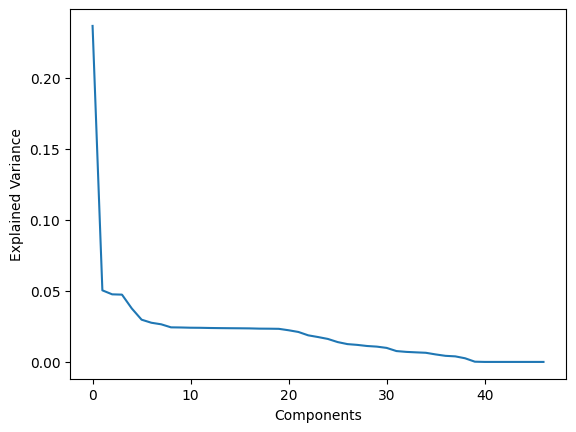

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

- Experience Varience Ratio (EVR) is going to sum up to 1.0 every time you use all of your principal components, so it does not depend on the amount of features used.
- In simple terms, PCA is going to decompose your dataset into n_features vectors sorted by their explained variance and then you may choose to take only top-n_components of those.
- If n_components==n_features, the original dataset can be fully restored from the decomposition, and EVR=1.0.
Based on the EVR we can drop some of the components to reduce the dimentsion

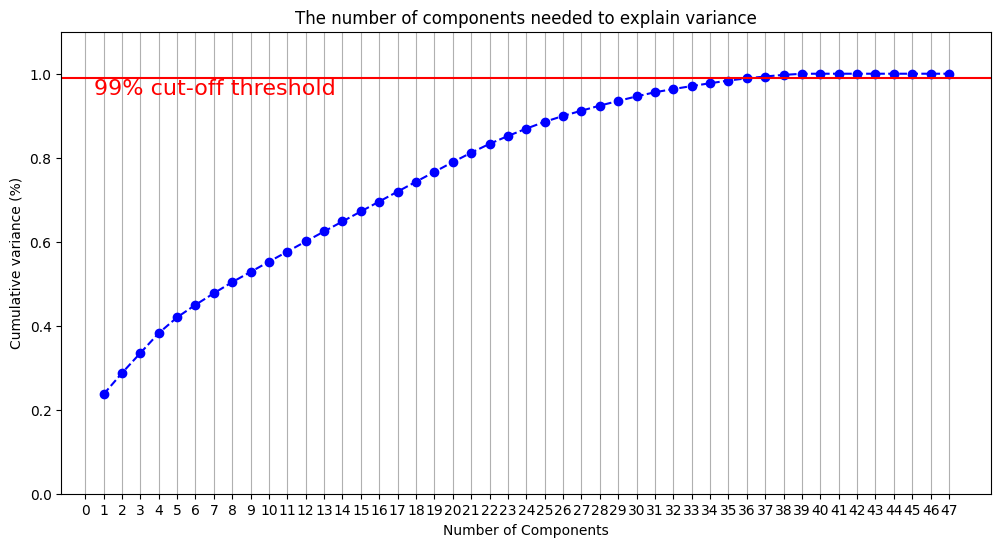

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
# xi should have the same number of elements as y
xi = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
# change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_) + 1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.95, '99% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

# **Interpretation:**

Diminishing Returns: Notice how the curve initially rises steeply, then flattens out. This indicates that the first few components capture a significant chunk of the variance, while subsequent components contribute less and less.

Choosing the Optimal Number of Components: The 99% threshold suggests that you could potentially retain enough information from your dataset by using a smaller number of components (around 10-15 in this case) than the total number of original features. This can be beneficial for:

Dimensionality Reduction: Simplifying your data for further analysis.
Noise Reduction: Potentially filtering out some noise by focusing on the most important patterns.